In [1]:
from sys import path as SP
SP.append('/Users/ratiswu/PYQUM_analysis')
import numpy as np
from os import listdir
from tools.tool import cal_SNR,gmm_defined_analytic,unpack,gmm_predict,find_file,change_label
import pandas as pd
from IPython.display import display
from os import makedirs,listdir,remove
from os.path import exists
import matplotlib.pyplot as plt
import pickle
import time
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

from tools.Load_PYQUM import Load_pyqum
from tools.tool import gmm_analytic,confidence_ellipse_gmm,std_dev,cal_Tmk
from tools.tool_self import give_plotRange, give_probaInfo, giveGMMandPlot, plot2QTOMO3DHist
import scipy
from math import erf

foldername = r"./data/TOMO/"
#pyqum_path = find_file(foldername,19)
pyqum_path = find_file(foldername)
pyqum = Load_pyqum(pyqum_path)
fq1 = float(pyqum.rjson()['Q1XYF'])
fq2 = float(pyqum.rjson()['Q2XYF'])
print("JOBID: ",pyqum.jobid)
version = input("measurement version: ")
df = pyqum.dataframe
df['I']*=1000
df['Q']*=1000
df


Pick an option:
1) TOMO_v1.pyqum	2) TOMO_v3.pyqum	3) .DS_Store	4) Bell_reAlign.pyqum	5) TOMO_v5.pyqum
6) TOMO_v2.pyqum	7) bell_base.pyqum	8) TOMO_v4.pyqum	9) both_H_2.pyqum	10) BELL_1.pyqum
11) BELL_3.pyqum	12) BELLreguH_noPHA.pyqum	13) BELL_2.pyqum	
Your Choice is 5
./data/TOMO/TOMO_v5.pyqum
Comment : 
TOMO v5

examine pyqum data
R-JSON :
	 ROSTART  :  140000
	 ROW  :  8000
	 Q1ROL  :  0.065
	 Q2ROL  :  0.08
	 ROF  :  5.934
	 ROdelay  :  280
	 ZW  :  150000
	 Q1Z  :  0.03
	 Q3Z  :  0.12
	 Q2Z  :  -0.0273
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-2*XYW  :  0
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYW  :  19
	 Q1XYF  :  3.9494
	 Q1XYL  :  0 0.2
	 Q1TOMOL  :  0 0.1 -0.1
	 Q2XYF  :  4.461588
	 Q2XYL  :  0 0.21
	 Q2TOMOL  :  0 0.105 -0.105
	 Q1TOMOR  :  0 90
	 Q2TOMOR  :  0 90
IF_ALIGN_MHz:  ['-186.776', '101.7']
RECORD-SUM :  10000
RECORD_TIME_NS :  1500
Change : 
	 ['Q1XYL' 'Q1TOMOL' 'Q2XYL' 'Q2TOMOL' 'Q1TOMOR' 'Q2TOMOR' 'IF_ALIGN_MHz'
 'RECORD-SUM']
Change command : 
	 ['0 0.2' '

Q1XYL  Q1TOMOL  Q2XYL  Q2TOMOL  Q1TOMOR  Q2TOMOR  IF_ALIGN_MHz  \
0          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
1          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
2          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
3          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
4          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
...        ...      ...    ...      ...      ...      ...           ...   
2879995    0.2     -0.1   0.21   -0.105     90.0     90.0       101.700   
2879996    0.2     -0.1   0.21   -0.105     90.0     90.0       101.700   
2879997    0.2     -0.1   0.21   -0.105     90.0     90.0       101.700   
2879998    0.2     -0.1   0.21   -0.105     90.0     90.0       101.700   
2879999    0.2     -0.1   0.21   -0.105     90.0     90.0       101.700   

         RECORD-SUM         I         Q  
0               1.0 -0.106326  0.658748  
1               2.0 -0.295653  0.063086  
2               3.0  0.166463  0.488702  
3               4.0  0.430664  0.507623  
4               5.0  0.088056  0.412550  
...             ...       ...       ...  
2879995      9996.0  0.542695 -0.231535  
2879996      9997.0  1.067922 -0.178047  
2879997      9998.0  0.876244 -0.272300  
2879998      9999.0  0.550908 -0.461036  
2879999     10000.0  0.139059 -0.090897  

[2880000 rows x 10 columns]

In [2]:
foldername = r"./data/TOMO/"
#pyqum_path = find_file(foldername,19)
pyqum_path = find_file(foldername)
pyqum_b = Load_pyqum(pyqum_path)
fq1 = float(pyqum.rjson()['Q1XYF'])
fq2 = float(pyqum.rjson()['Q2XYF'])
print("JOBID: ",pyqum.jobid)
version_b  = input("measurement version: ")
df_b = pyqum_b.dataframe
df_b['I']*=1000
df_b['Q']*=1000
df_b 

Pick an option:
1) TOMO_v1.pyqum	2) TOMO_v3.pyqum	3) .DS_Store	4) Bell_reAlign.pyqum	5) TOMO_v5.pyqum
6) TOMO_v2.pyqum	7) bell_base.pyqum	8) TOMO_v4.pyqum	9) both_H_2.pyqum	10) BELL_1.pyqum
11) BELL_3.pyqum	12) BELLreguH_noPHA.pyqum	13) BELL_2.pyqum	
Your Choice is 


ValueError: invalid literal for int() with base 10: ''

In [3]:
Q1iF = -186.776 
Q2iF = 101.700

Q1df = df_b[df_b["IF_ALIGN_MHz"]==Q1iF]
Q2df = df_b[df_b["IF_ALIGN_MHz"]==Q2iF]

Q1_df = Q1df[(Q1df['Q2XYL']==0.00)]
Q1g = Q1df[(Q1df['Q1XYL']==Q1df['Q1XYL'].unique()[0]) & (Q1df['Q2XYL']==0.00)]
Q1e = Q1df[(Q1df['Q1XYL']==Q1df['Q1XYL'].unique()[1]) & (Q1df['Q2XYL']==0.00)]

Q2_df = Q2df[(Q2df['Q1XYL']==0.0)]
Q2g = Q2df[(Q2df['Q2XYL']==Q2df['Q2XYL'].unique()[0]) & (Q2df['Q1XYL']==0.0)]
Q2e = Q2df[(Q2df['Q2XYL']==Q2df['Q2XYL'].unique()[1]) & (Q2df['Q1XYL']==0.0)]


Q1Ms = giveGMMandPlot(Q1df,Q1g,Q1e,fq1,2,True,False,"Q1","Q1XYL",[])
Q2Ms = giveGMMandPlot(Q2df,Q2g,Q2e,fq2,2,True,False,"Q2","Q2XYL",[])

NameError: name 'df_b' is not defined

In [2]:
Q1iF = -186.776 
Q2iF = 101.700
Q1gL = 0.0
Q1eL = 0.2
Q2gL = 0.00
Q2eL = 0.21
Q1_x_dir_tomoL = 0.1   # -y/2 
Q2_x_dir_tomoL = 0.105 
Q1_y_dir_tomoL = -0.1    # x/2
Q2_y_dir_tomoL = -0.105
Q1_z_dir_tomoL = 0.0
Q2_z_dir_tomoL = 0.000
Q1_x_R = 0        # Ry pulse
Q2_x_R = 0          
Q1_y_R = 90        # Rx 
Q2_y_R = 90
Q1_z_R = 0
Q2_z_R = 0

Q1_tomoL_key = "Q1TOMOL"
Q2_tomoL_key = "Q2TOMOL"
Q1_tomoR_key = "Q1TOMOR"
Q2_tomoR_key = "Q2TOMOR"
Q1_XYL_key = "Q1XYL"
Q2_XYL_key = "Q2XYL"


Q1df = df[df["IF_ALIGN_MHz"]==Q1iF]
Q2df = df[df["IF_ALIGN_MHz"]==Q2iF]

print("Q1 DF: ")
display(Q1df)
print("\n Q2 DF: ")
display(Q2df)

Q1 DF: 


Q1XYL  Q1TOMOL  Q2XYL  Q2TOMOL  Q1TOMOR  Q2TOMOR  IF_ALIGN_MHz  \
0          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
1          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
2          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
3          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
4          0.0      0.0   0.00    0.000      0.0      0.0      -186.776   
...        ...      ...    ...      ...      ...      ...           ...   
2869995    0.2     -0.1   0.21   -0.105     90.0     90.0      -186.776   
2869996    0.2     -0.1   0.21   -0.105     90.0     90.0      -186.776   
2869997    0.2     -0.1   0.21   -0.105     90.0     90.0      -186.776   
2869998    0.2     -0.1   0.21   -0.105     90.0     90.0      -186.776   
2869999    0.2     -0.1   0.21   -0.105     90.0     90.0      -186.776   

         RECORD-SUM         I         Q  
0               1.0 -0.106326  0.658748  
1               2.0 -0.295653  0.063086  
2               3.0  0.166463  0.488702  
3               4.0  0.430664  0.507623  
4               5.0  0.088056  0.412550  
...             ...       ...       ...  
2869995      9996.0 -0.070364  0.363015  
2869996      9997.0  0.936991  0.814784  
2869997      9998.0  0.424371  0.608183  
2869998      9999.0 -0.089671  0.648623  
2869999     10000.0 -0.101910  0.233899  

[1440000 rows x 10 columns]


 Q2 DF: 


Q1XYL  Q1TOMOL  Q2XYL  Q2TOMOL  Q1TOMOR  Q2TOMOR  IF_ALIGN_MHz  \
10000      0.0      0.0   0.00    0.000      0.0      0.0         101.7   
10001      0.0      0.0   0.00    0.000      0.0      0.0         101.7   
10002      0.0      0.0   0.00    0.000      0.0      0.0         101.7   
10003      0.0      0.0   0.00    0.000      0.0      0.0         101.7   
10004      0.0      0.0   0.00    0.000      0.0      0.0         101.7   
...        ...      ...    ...      ...      ...      ...           ...   
2879995    0.2     -0.1   0.21   -0.105     90.0     90.0         101.7   
2879996    0.2     -0.1   0.21   -0.105     90.0     90.0         101.7   
2879997    0.2     -0.1   0.21   -0.105     90.0     90.0         101.7   
2879998    0.2     -0.1   0.21   -0.105     90.0     90.0         101.7   
2879999    0.2     -0.1   0.21   -0.105     90.0     90.0         101.7   

         RECORD-SUM         I         Q  
10000           1.0  0.789056 -0.019498  
10001           2.0  0.742059 -0.580522  
10002           3.0  0.962152 -0.238112  
10003           4.0  0.545387 -0.561186  
10004           5.0  0.490412 -0.320946  
...             ...       ...       ...  
2879995      9996.0  0.542695 -0.231535  
2879996      9997.0  1.067922 -0.178047  
2879997      9998.0  0.876244 -0.272300  
2879998      9999.0  0.550908 -0.461036  
2879999     10000.0  0.139059 -0.090897  

[1440000 rows x 10 columns]

In [3]:
# for model build up Condition 1) both TOMOL&TOMOR is z directional, 2) both are ground or both are excited
## Q1
Q1_fit_df_G = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_fit_df_E = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_fit_df_M = pd.concat([Q1_fit_df_G,Q1_fit_df_E])
## Q2
Q2_fit_df_G = Q2df[(Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_fit_df_E = Q2df[(Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_fit_df_M = pd.concat([Q2_fit_df_G,Q2_fit_df_E])



### For TOMOlyze
## variable name: readQ_Q1derQ2der_df_Q1stateQ2state
# XX direction
## Q1
Q1_xx_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xx_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_xx_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xx_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_xx_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xx_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_xx_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xx_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# XY direction
## Q1
Q1_xy_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xy_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_xy_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xy_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_xy_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xy_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_xy_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xy_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# XZ direction
## Q1
Q1_xz_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xz_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_xz_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_xz_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_x_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_xz_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xz_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_xz_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_xz_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_x_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_x_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# YX direction
## Q1
Q1_yx_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yx_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_yx_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yx_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_yx_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yx_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_yx_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yx_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# YY direction
## Q1
Q1_yy_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yy_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_yy_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yy_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_yy_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yy_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_yy_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yy_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# YZ direction
## Q1
Q1_yz_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yz_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_yz_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_yz_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_y_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_yz_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yz_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_yz_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_yz_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_y_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_y_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# ZX direction
## Q1
Q1_zx_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zx_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_zx_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zx_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_x_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_zx_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zx_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_zx_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zx_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_x_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_x_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# ZY direction
## Q1
Q1_zy_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zy_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_zy_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zy_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_y_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_zy_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zy_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_zy_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zy_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_y_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_y_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]

# ZZ direction
## Q1
Q1_zz_df_gg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zz_df_ee = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2eL)]
Q1_zz_df_eg = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1eL) & (Q1df[Q2_XYL_key]==Q2gL)]
Q1_zz_df_ge = Q1df[(Q1df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q1df[Q1_tomoR_key]==Q1_z_R) & (Q1df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q1df[Q2_tomoR_key]==Q2_z_R) & (Q1df[Q1_XYL_key]==Q1gL) & (Q1df[Q2_XYL_key]==Q2eL)]
## Q2
Q2_zz_df_gg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zz_df_ee = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2eL)]
Q2_zz_df_eg = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1eL) & (Q2df[Q2_XYL_key]==Q2gL)]
Q2_zz_df_ge = Q2df[(Q2df[Q1_tomoL_key]==Q1_z_dir_tomoL) & (Q2df[Q1_tomoR_key]==Q1_z_R) & (Q2df[Q2_tomoL_key]==Q2_z_dir_tomoL) & (Q2df[Q2_tomoR_key]==Q2_z_R) & (Q2df[Q1_XYL_key]==Q1gL) & (Q2df[Q2_XYL_key]==Q2eL)]





# print("Model fitting DataFrame:")
# display(Q1_fit_df_M)
print("X directional both prepare ground DataFrame:")
display(Q1_fit_df_G)
print("Y directional both prepare ground DataFrame:")
display(Q2_fit_df_E)
# print("Z directional both prepare ground DataFrame:")
# display(Q1_z_df_gg)

X directional both prepare ground DataFrame:


Q1XYL  Q1TOMOL  Q2XYL  Q2TOMOL  Q1TOMOR  Q2TOMOR  IF_ALIGN_MHz  \
0       0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
1       0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
2       0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
3       0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
4       0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
...     ...      ...    ...      ...      ...      ...           ...   
9995    0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
9996    0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
9997    0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
9998    0.0      0.0    0.0      0.0      0.0      0.0      -186.776   
9999    0.0      0.0    0.0      0.0      0.0      0.0      -186.776   

      RECORD-SUM         I         Q  
0            1.0 -0.106326  0.658748  
1            2.0 -0.295653  0.063086  
2            3.0  0.166463  0.488702  
3            4.0  0.430664  0.507623  
4            5.0  0.088056  0.412550  
...          ...       ...       ...  
9995      9996.0 -0.065086  0.313312  
9996      9997.0 -0.154740  0.719322  
9997      9998.0 -0.177841  0.348783  
9998      9999.0  0.168971  0.698281  
9999     10000.0 -0.273124  0.413645  

[10000 rows x 10 columns]

Y directional both prepare ground DataFrame:


Q1XYL  Q1TOMOL  Q2XYL  Q2TOMOL  Q1TOMOR  Q2TOMOR  IF_ALIGN_MHz  \
1690000    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1690001    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1690002    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1690003    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1690004    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
...        ...      ...    ...      ...      ...      ...           ...   
1699995    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1699996    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1699997    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1699998    0.2      0.0   0.21      0.0      0.0      0.0         101.7   
1699999    0.2      0.0   0.21      0.0      0.0      0.0         101.7   

         RECORD-SUM         I         Q  
1690000         1.0  0.626825  0.275568  
1690001         2.0 -0.190190 -0.513395  
1690002         3.0  0.325150 -0.192577  
1690003         4.0 -0.111372 -0.605114  
1690004         5.0 -0.271486 -0.109685  
...             ...       ...       ...  
1699995      9996.0  0.589218 -0.130453  
1699996      9997.0  0.070096  0.083469  
1699997      9998.0 -0.124443 -0.350162  
1699998      9999.0 -0.127348 -0.306866  
1699999     10000.0 -0.188789  0.027817  

[10000 rows x 10 columns]

S :  0.8206549498004184  ; N :  0.13176992930746426  ; SNR :  5.110988145561505
mark_gmm:  True


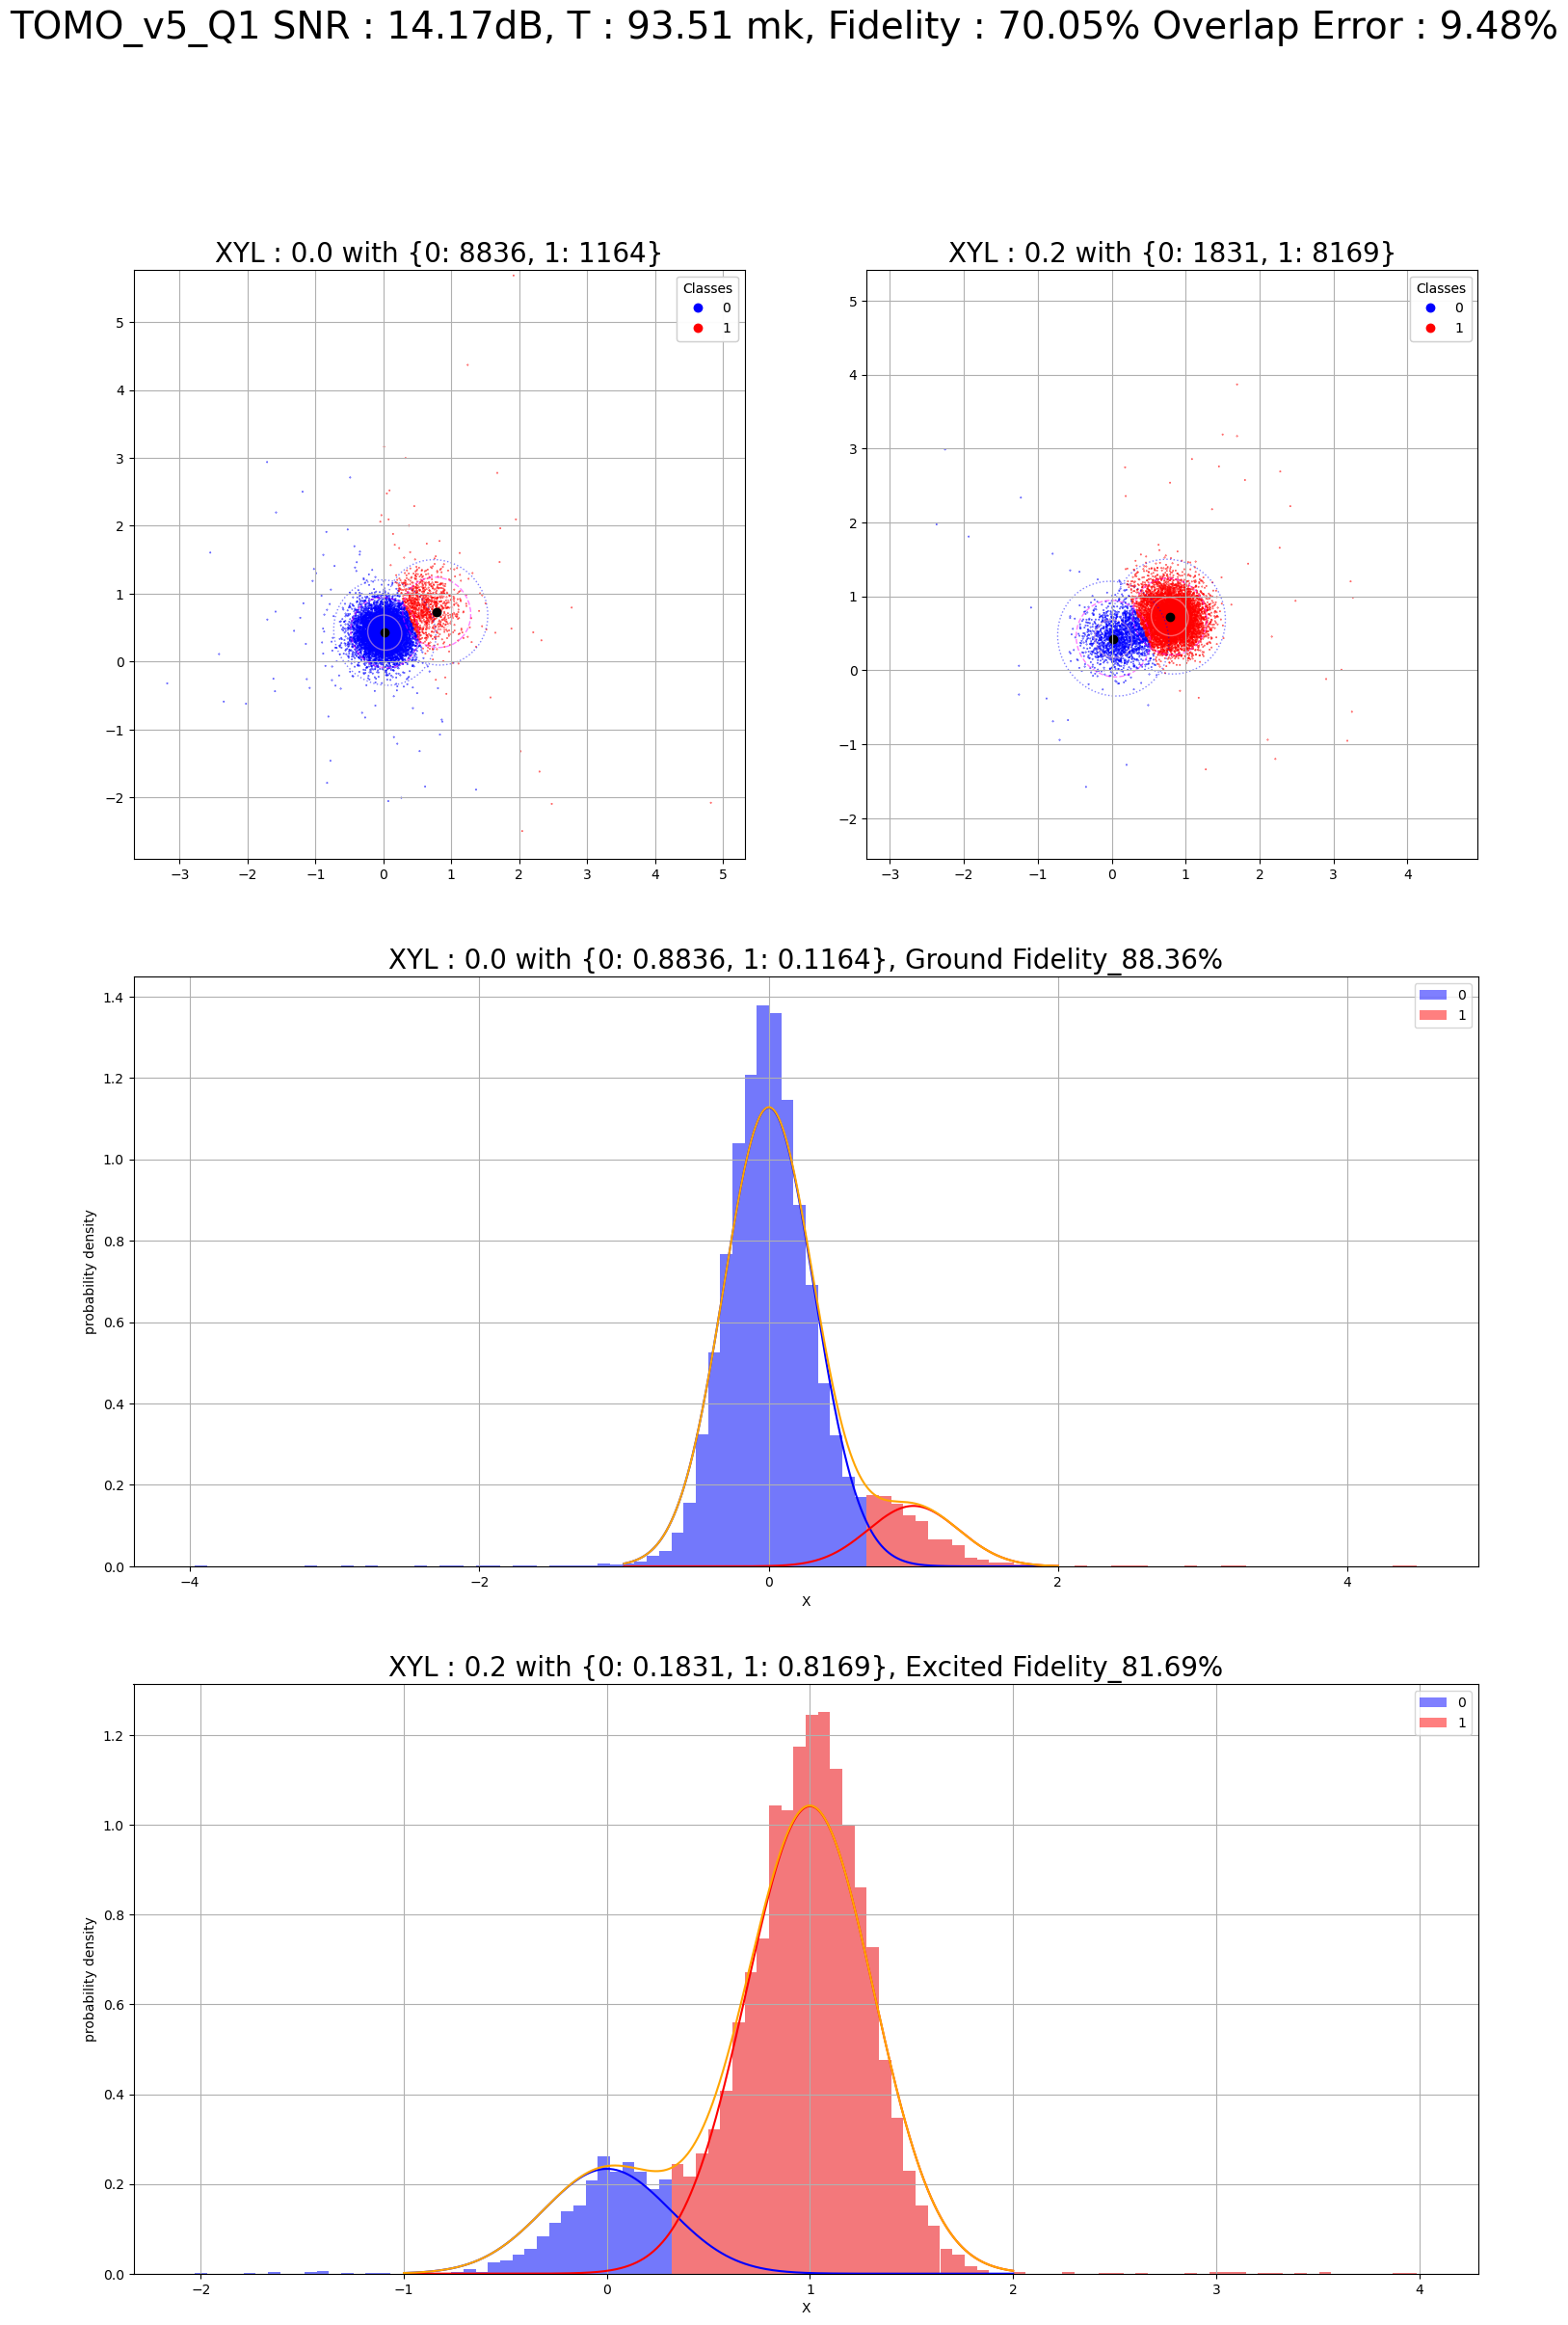

Effective T: 93.51 mK
Overlap Error: 9.48%
S: 0.8206549498004184
N: 0.31277538355794304
SNR:  2.623783689320897
S :  0.7714420560380096  ; N :  0.08540315177776128  ; SNR :  6.968394414445016
mark_gmm:  False


<Figure size 640x480 with 0 Axes>

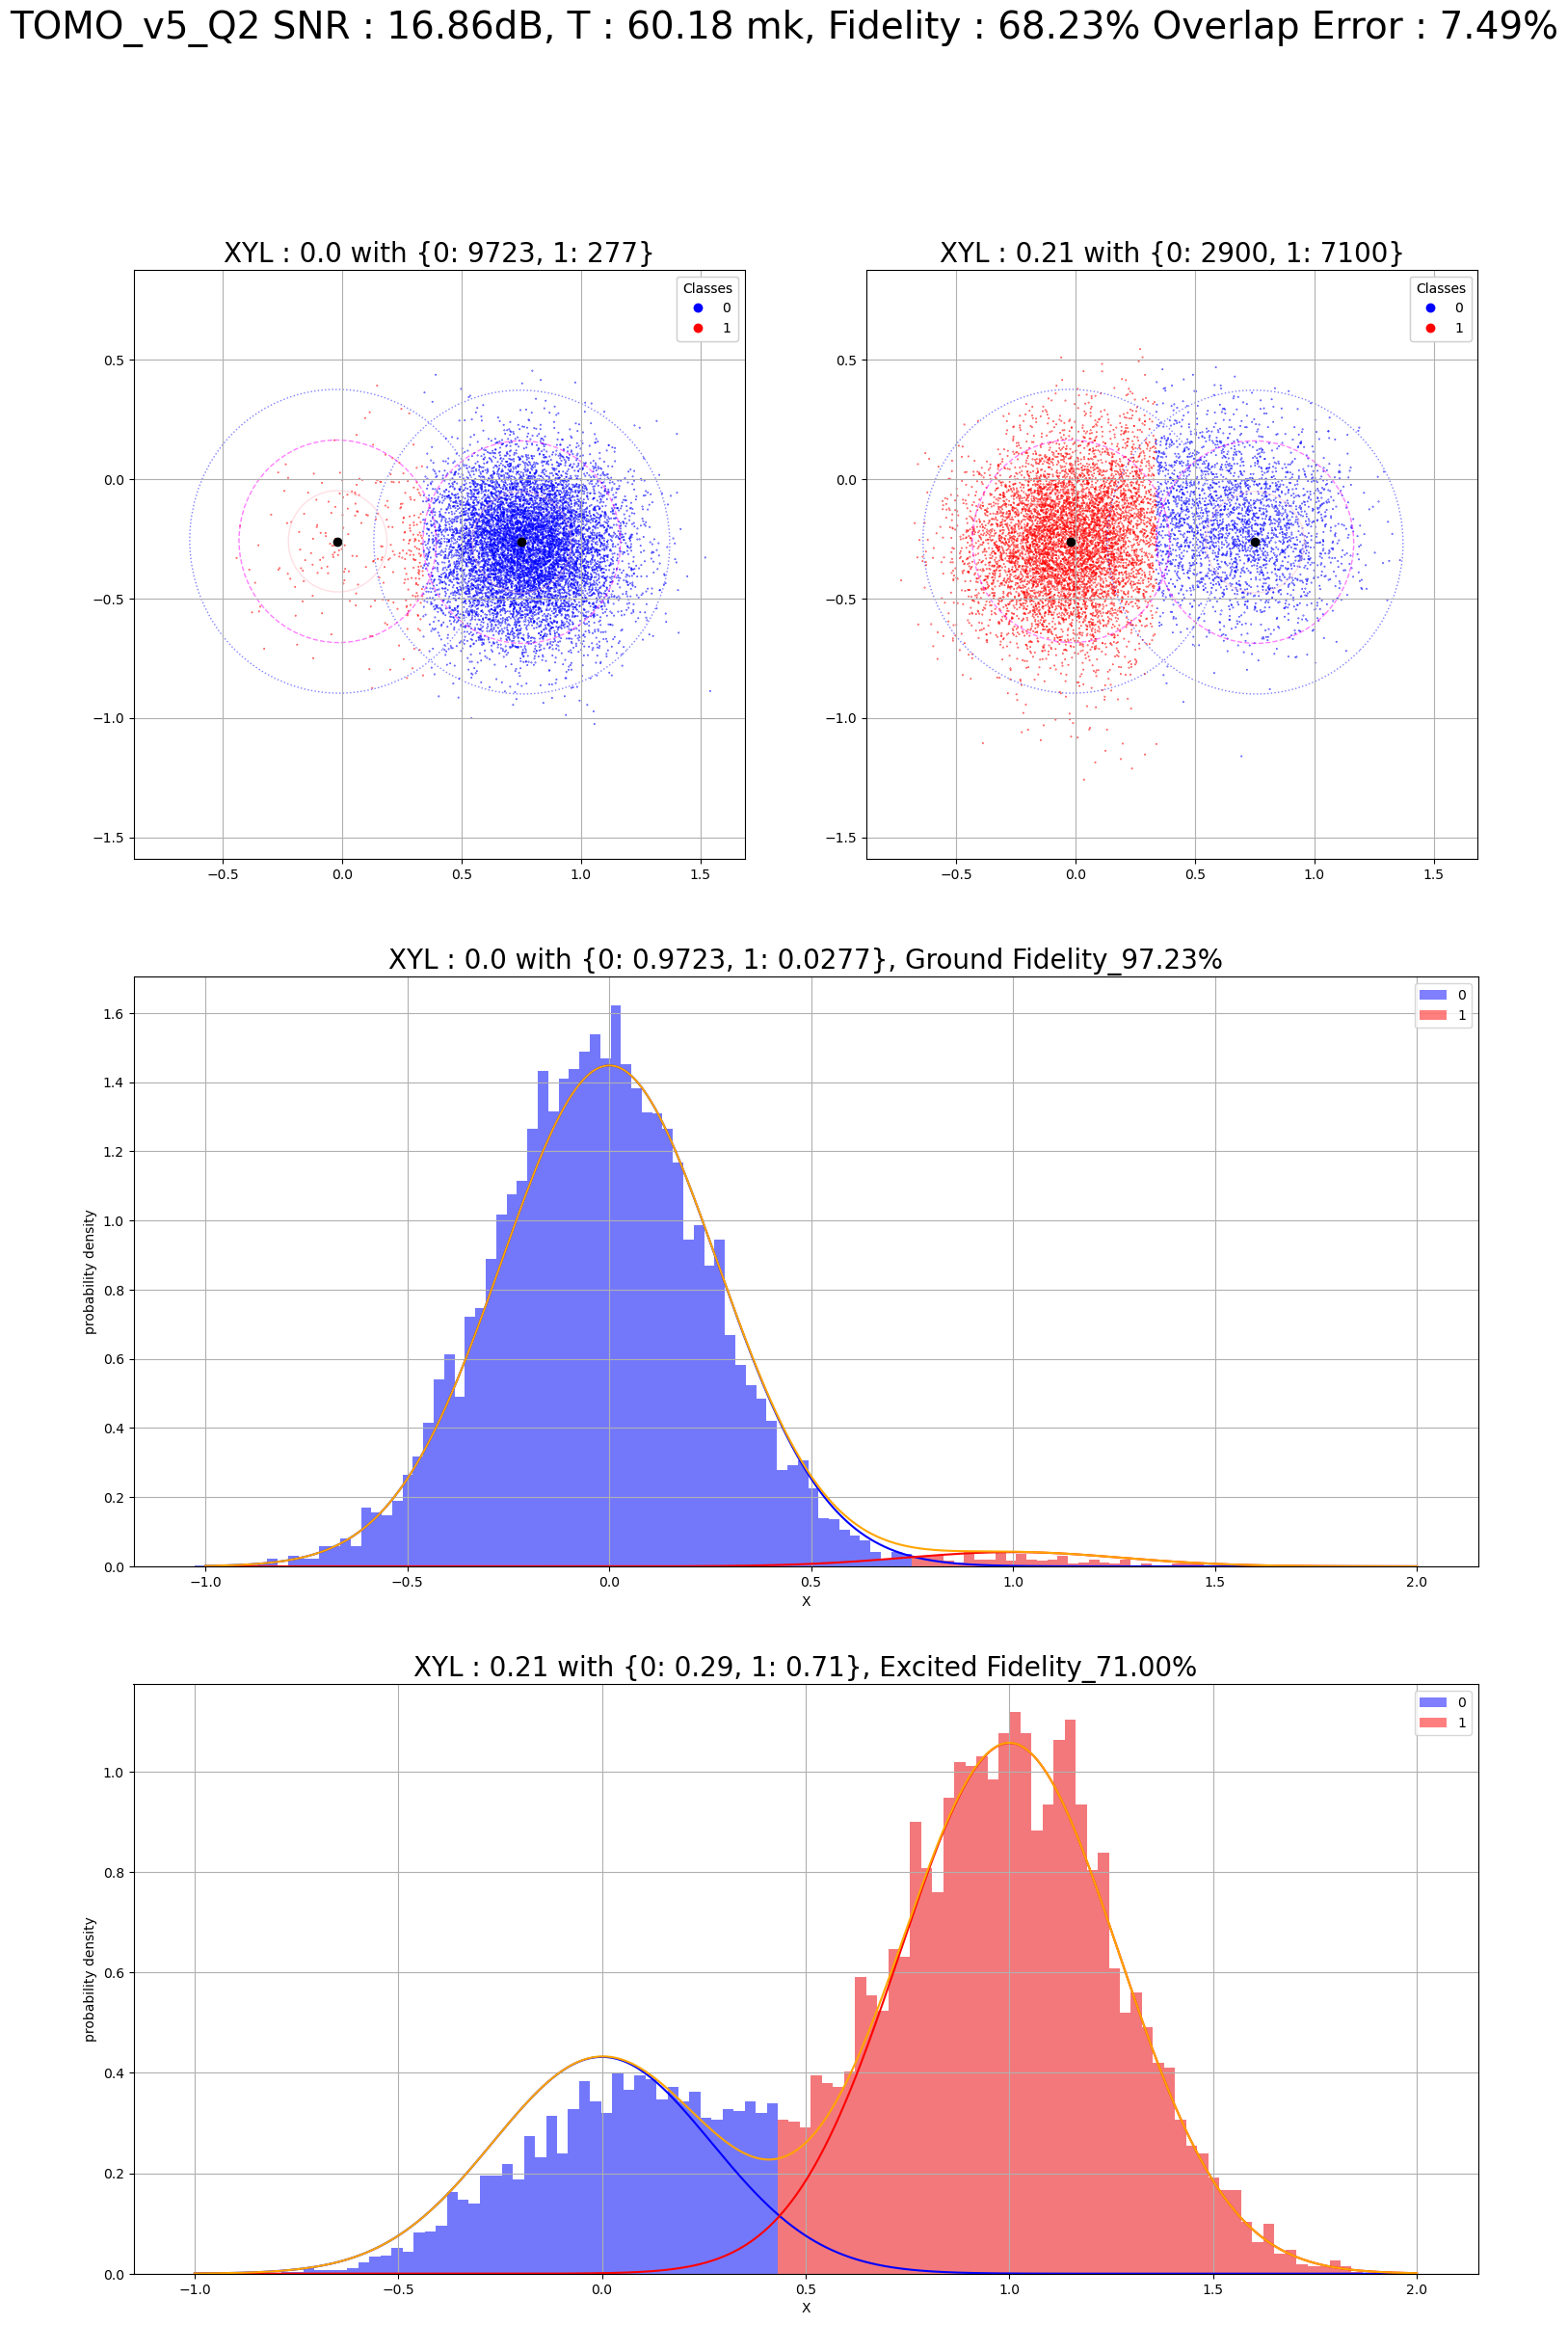

Effective T: 60.18 mK
Overlap Error: 7.49%
S: 0.7714420560380096
N: 0.2678666462057146
SNR:  2.879948164377144


<Figure size 640x480 with 0 Axes>

In [4]:
Q1Ms = giveGMMandPlot(Q1_fit_df_M,Q1_fit_df_G,Q1_fit_df_E,fq1,2,True,False,"TOMO_v5_Q1","Q1XYL",[])
Q2Ms = giveGMMandPlot(Q2_fit_df_M,Q2_fit_df_G,Q2_fit_df_E,fq2,2,True,False,"TOMO_v5_Q2","Q2XYL",[])

prepare |00> :  {'00': 0.861, '01': 0.0226, '10': 0.1113, '11': 0.0051}
prepare |11> :  {'00': 0.0473, '01': 0.1358, '10': 0.2427, '11': 0.5742}


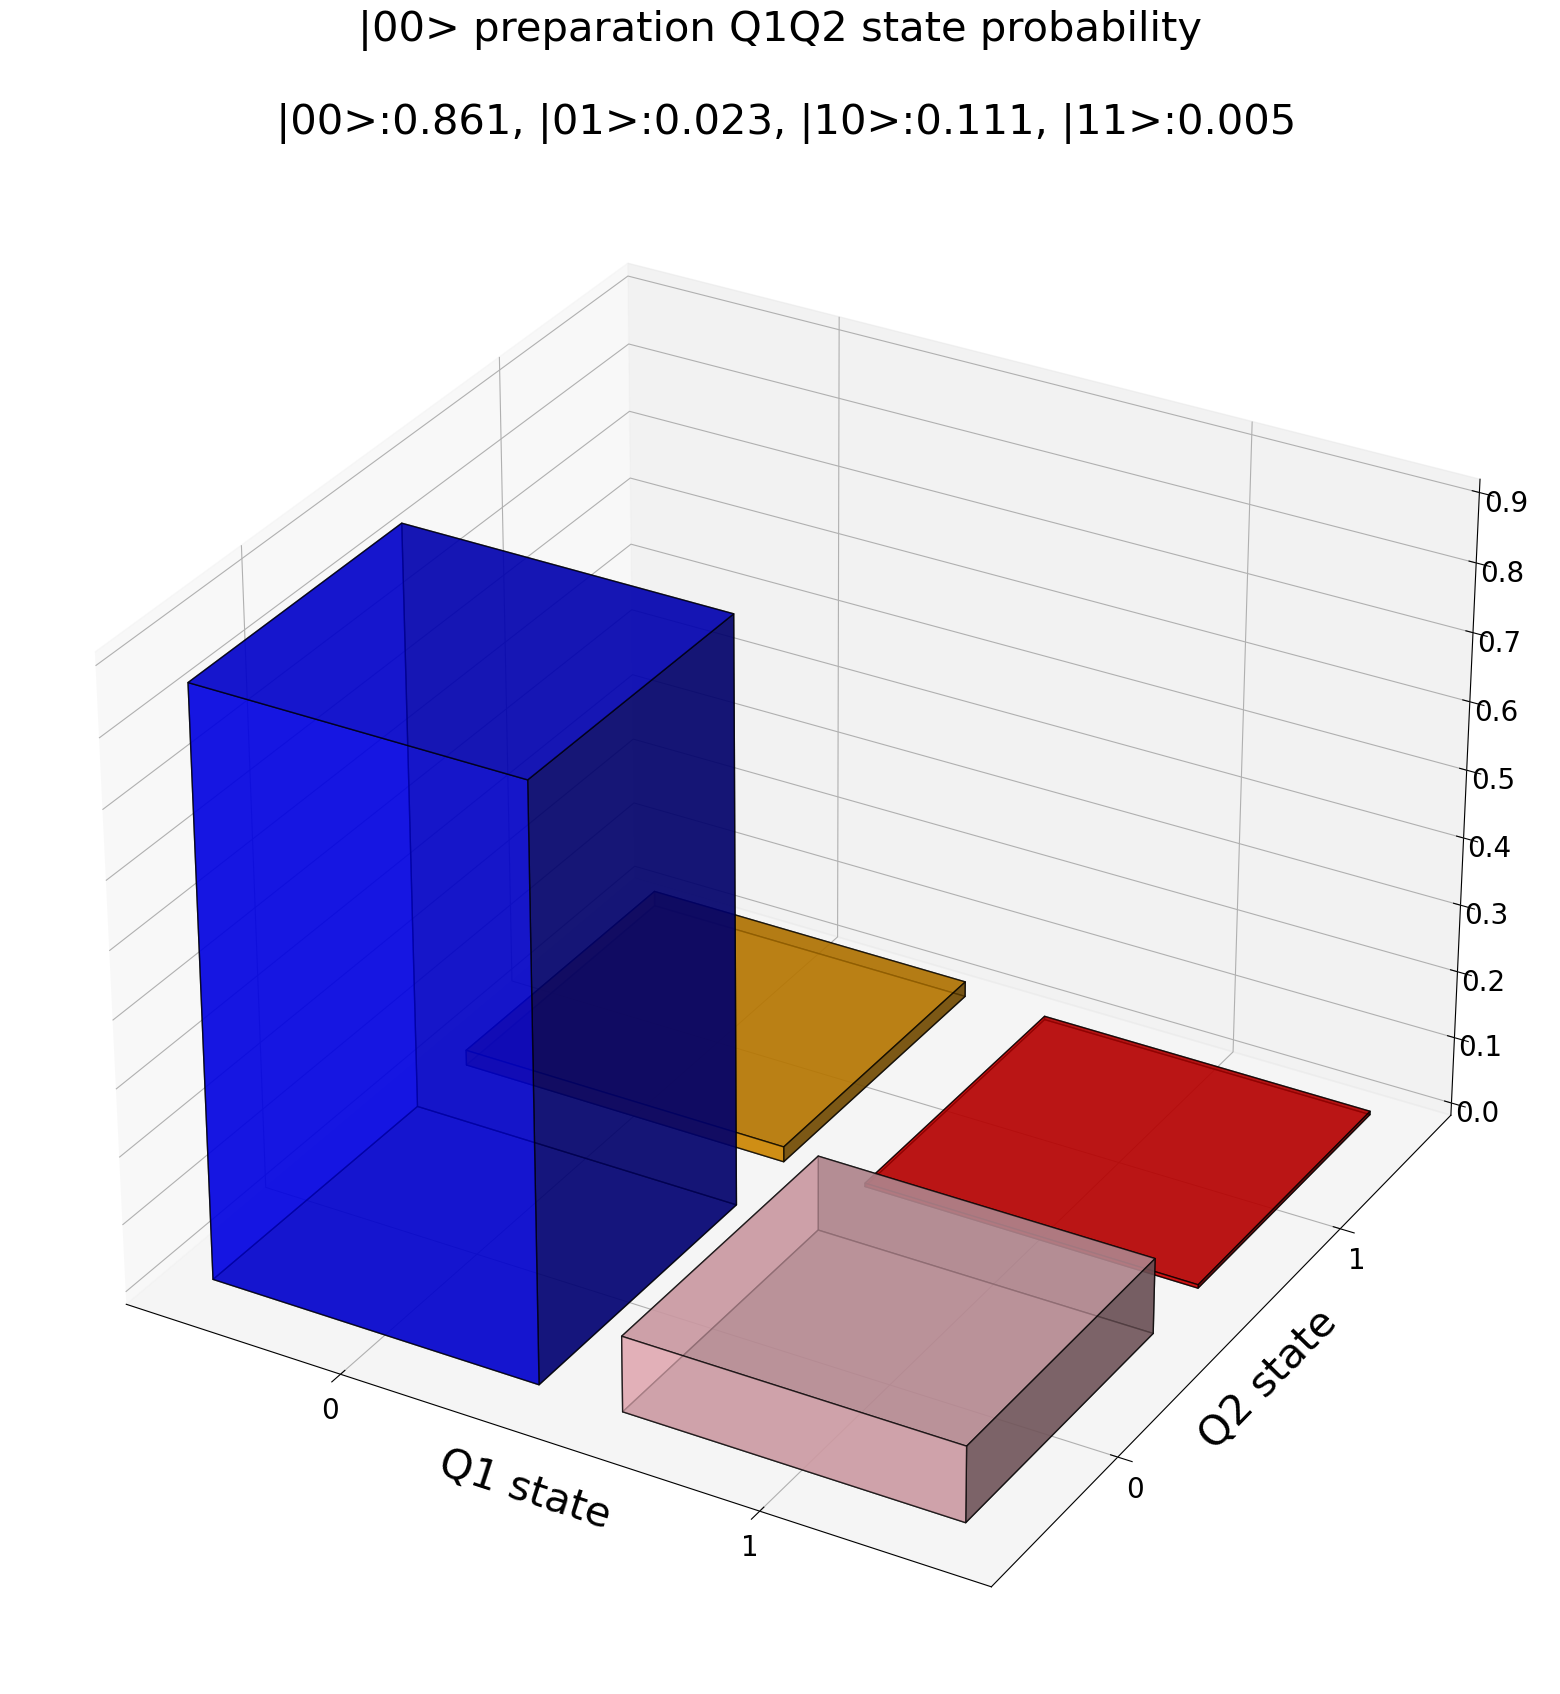

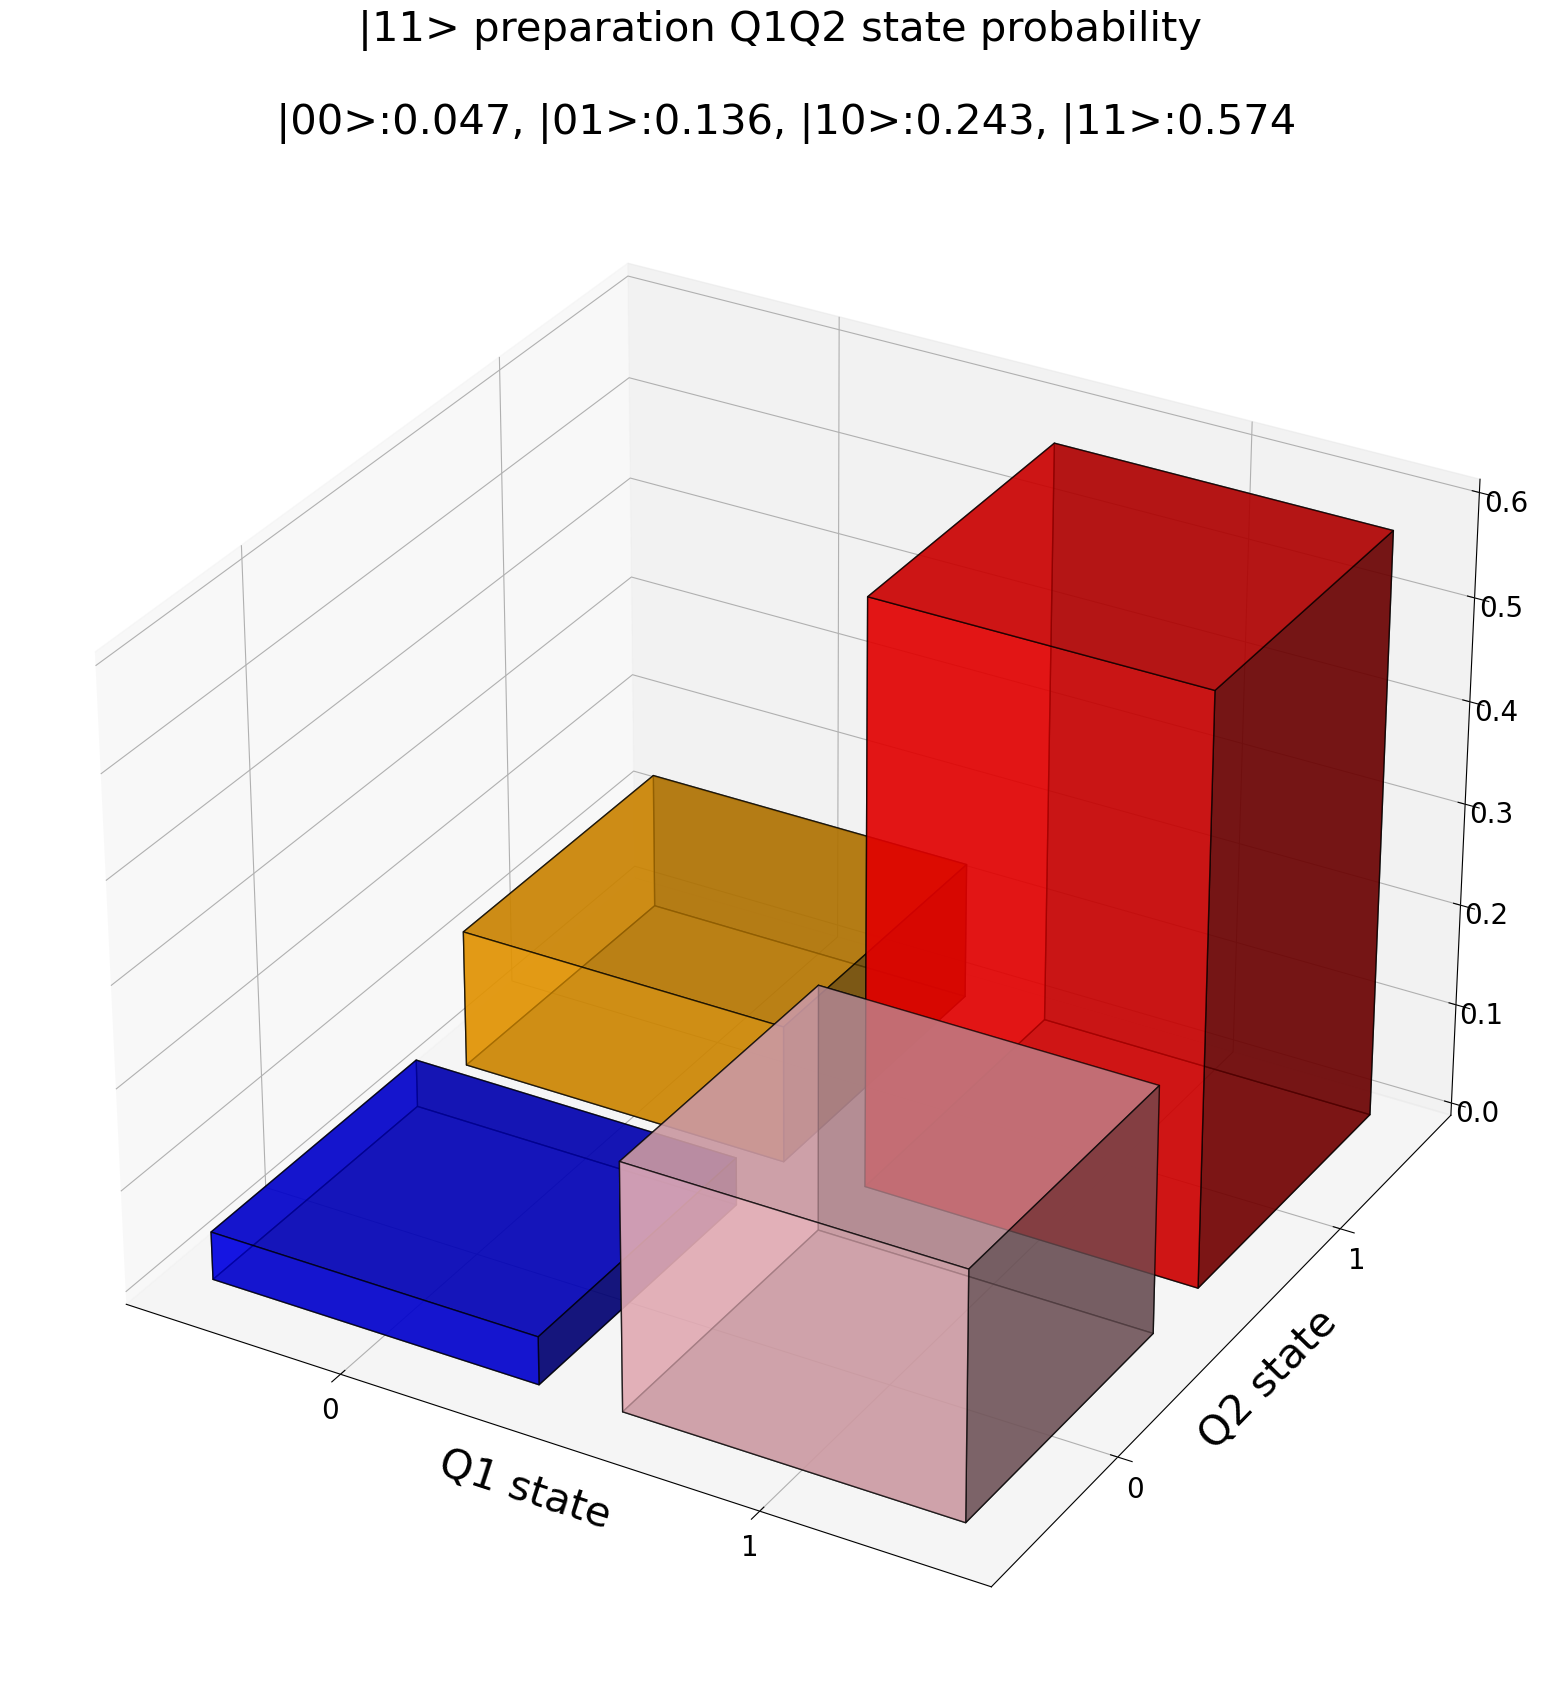

In [14]:
prepare_00_probas = give_probaInfo(Q1Ms,Q2Ms,Q1_fit_df_G,Q2_fit_df_G,'all')
prepare_11_probas = give_probaInfo(Q1Ms,Q2Ms,Q1_fit_df_E,Q2_fit_df_E,'all')

print("prepare |00> : ",prepare_00_probas)
print("prepare |11> : ",prepare_11_probas)

from tools.tool_self import plotProb3DHist

plotProb3DHist(tuple(prepare_00_probas.values()),"|00> preparation",False,version)
plotProb3DHist(tuple(prepare_11_probas.values()),"|11> preparation",False,version)

In [8]:
### [\00>, |01>, |10>, |11>]
tot_n = 9*4
now_n = 0
def progress_report(now_n, tot_n):
    now_n += 1
    print("\r"+str(now_n*100/tot_n)+"%",end="")
    return now_n

# XX directional TOMO
tomo_xx_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_xx_df_ee,Q2_xx_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_xx_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_xx_df_eg,Q2_xx_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_xx_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_xx_df_ge,Q2_xx_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_xx_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_xx_df_gg,Q2_xx_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# XY directional TOMO
tomo_xy_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_xy_df_ee,Q2_xy_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_xy_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_xy_df_eg,Q2_xy_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_xy_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_xy_df_ge,Q2_xy_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_xy_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_xy_df_gg,Q2_xy_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# XZ directional TOMO
tomo_xz_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_xz_df_ee,Q2_xz_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_xz_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_xz_df_eg,Q2_xz_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_xz_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_xz_df_ge,Q2_xz_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_xz_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_xz_df_gg,Q2_xz_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# YX directional TOMO
tomo_yx_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_yx_df_ee,Q2_yx_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_yx_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_yx_df_eg,Q2_yx_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_yx_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_yx_df_ge,Q2_yx_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_yx_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_yx_df_gg,Q2_yx_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# YY directional TOMO
tomo_yy_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_yy_df_ee,Q2_yy_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_yy_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_yy_df_eg,Q2_yy_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_yy_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_yy_df_ge,Q2_yy_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_yy_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_yy_df_gg,Q2_yy_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# YZ directional TOMO
tomo_yz_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_yz_df_ee,Q2_yz_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_yz_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_yz_df_eg,Q2_yz_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_yz_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_yz_df_ge,Q2_yz_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_yz_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_yz_df_gg,Q2_yz_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# ZX directional TOMO
tomo_zx_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_zx_df_ee,Q2_zx_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_zx_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_zx_df_eg,Q2_zx_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_zx_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_zx_df_ge,Q2_zx_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_zx_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_zx_df_gg,Q2_zx_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# ZY directional TOMO
tomo_zy_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_zy_df_ee,Q2_zy_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_zy_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_zy_df_eg,Q2_zy_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_zy_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_zy_df_ge,Q2_zy_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_zy_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_zy_df_gg,Q2_zy_df_gg,'all')
now_n = progress_report(now_n, tot_n)
# ZZ directional TOMO
tomo_zz_EE = give_probaInfo(Q1Ms,Q2Ms,Q1_zz_df_ee,Q2_zz_df_ee,'all')
now_n = progress_report(now_n, tot_n)
tomo_zz_EG = give_probaInfo(Q1Ms,Q2Ms,Q1_zz_df_eg,Q2_zz_df_eg,'all')
now_n = progress_report(now_n, tot_n)
tomo_zz_GE = give_probaInfo(Q1Ms,Q2Ms,Q1_zz_df_ge,Q2_zz_df_ge,'all')
now_n = progress_report(now_n, tot_n)
tomo_zz_GG = give_probaInfo(Q1Ms,Q2Ms,Q1_zz_df_gg,Q2_zz_df_gg,'all')
now_n = progress_report(now_n, tot_n)

100.0%22222222223%%

Prepare |00> : 
Whole Density matrix: 
[[ 0.861  +0.j      0.0652 -0.0668j  0.056  -0.0491j  0.00395-0.0048j]
 [ 0.0652 +0.0668j  0.0226 +0.j      0.00445-0.0023j -0.004  -0.0009j]
 [ 0.056  +0.0491j  0.00445+0.0023j  0.1113 +0.j      0.0092 -0.0151j]
 [ 0.00395+0.0048j -0.004  +0.0009j  0.0092 +0.0151j  0.0051 +0.j    ]]

Density matrix real part: 
[[ 0.861    0.0652   0.056    0.00395]
 [ 0.0652   0.0226   0.00445 -0.004  ]
 [ 0.056    0.00445  0.1113   0.0092 ]
 [ 0.00395 -0.004    0.0092   0.0051 ]]

Density matrix imaginary part: 
[[ 0.     -0.0668 -0.0491 -0.0048]
 [ 0.0668  0.     -0.0023 -0.0009]
 [ 0.0491  0.0023  0.     -0.0151]
 [ 0.0048  0.0009  0.0151  0.    ]]
Trace Rho:  (0.9999999999999999+0j)
Trace Rho square:  (0.7542454599999999+0j)


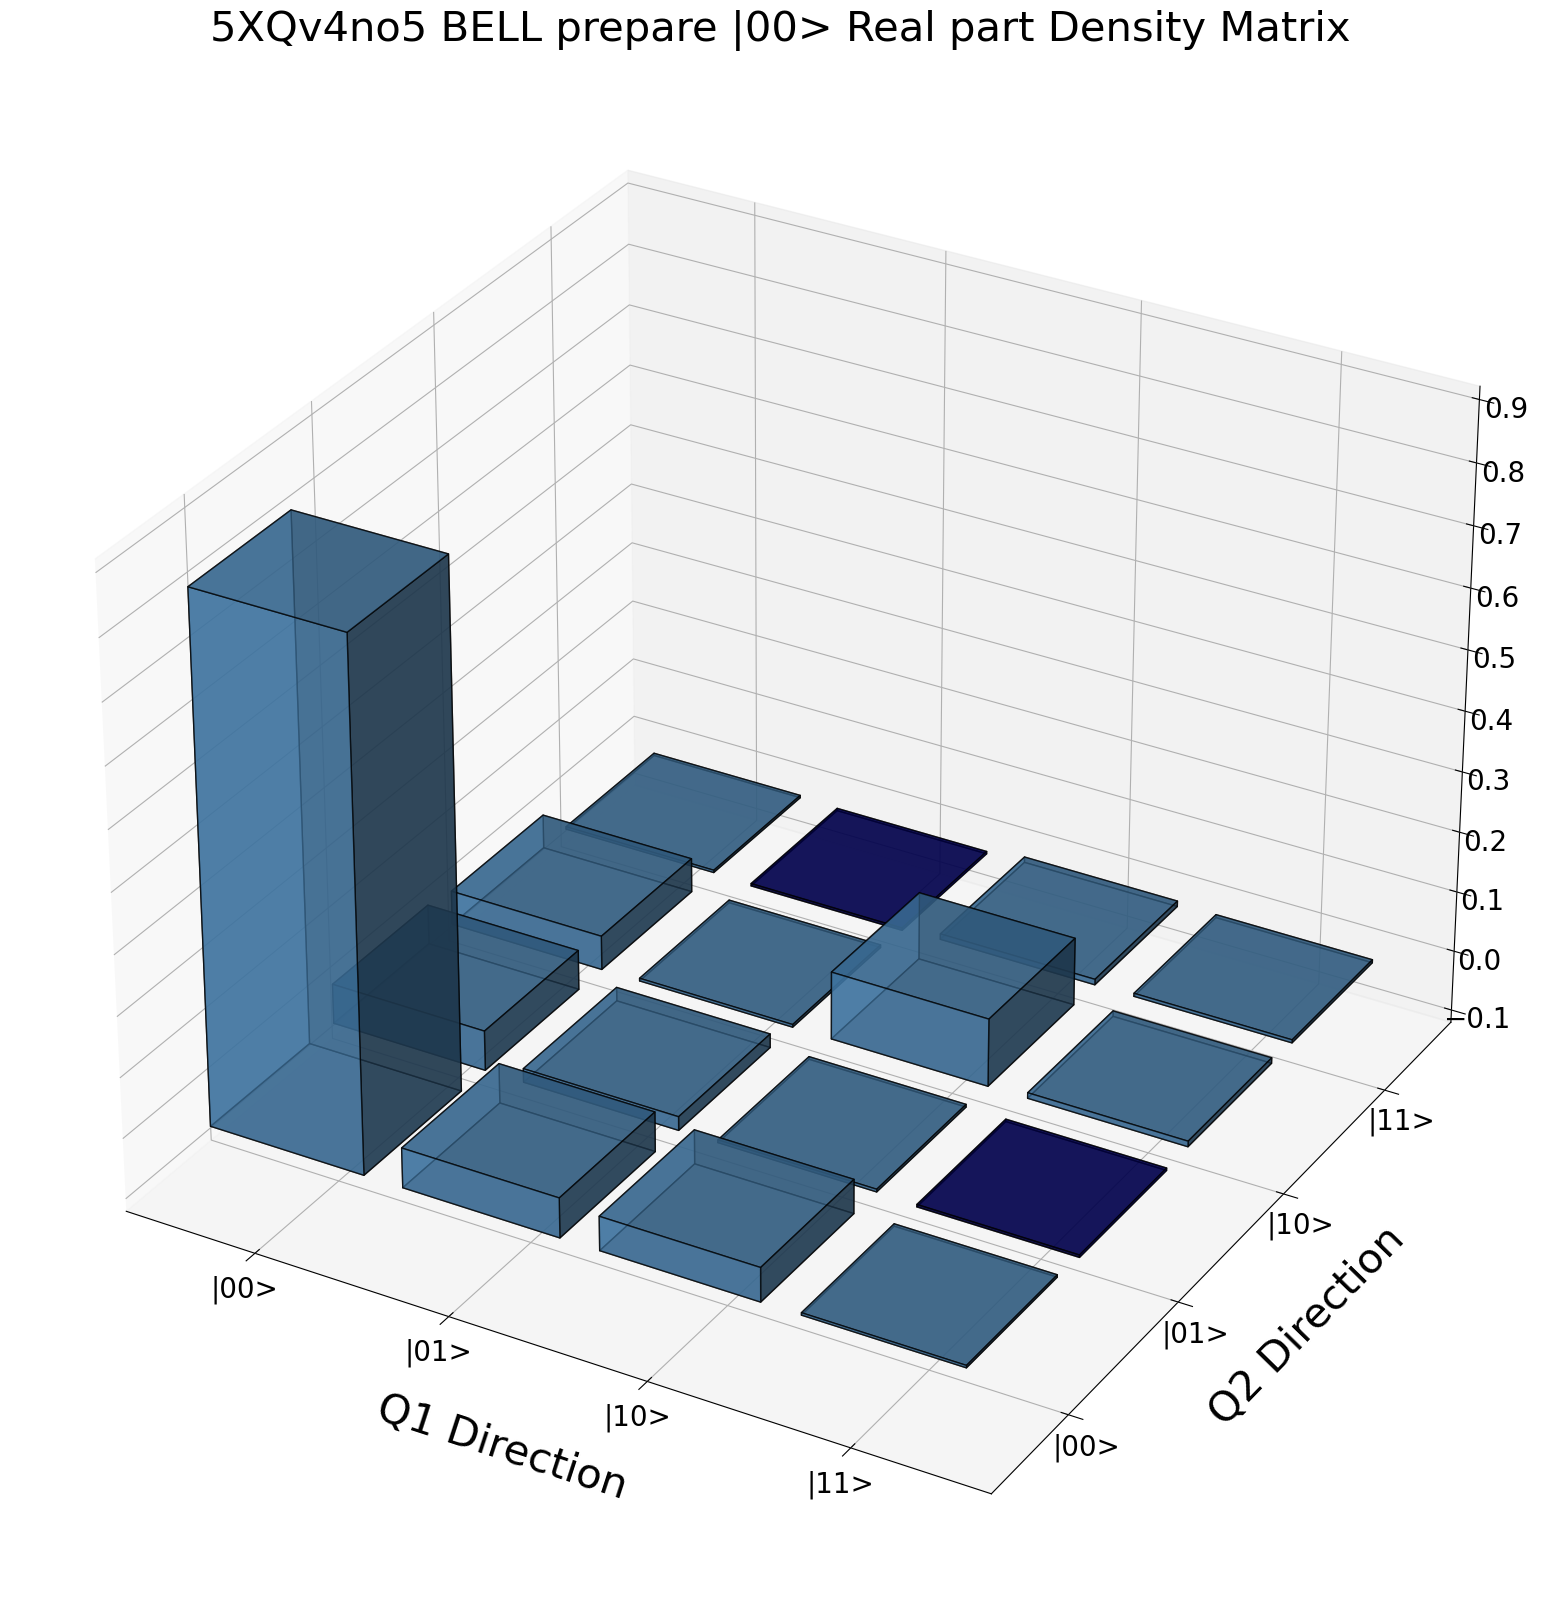

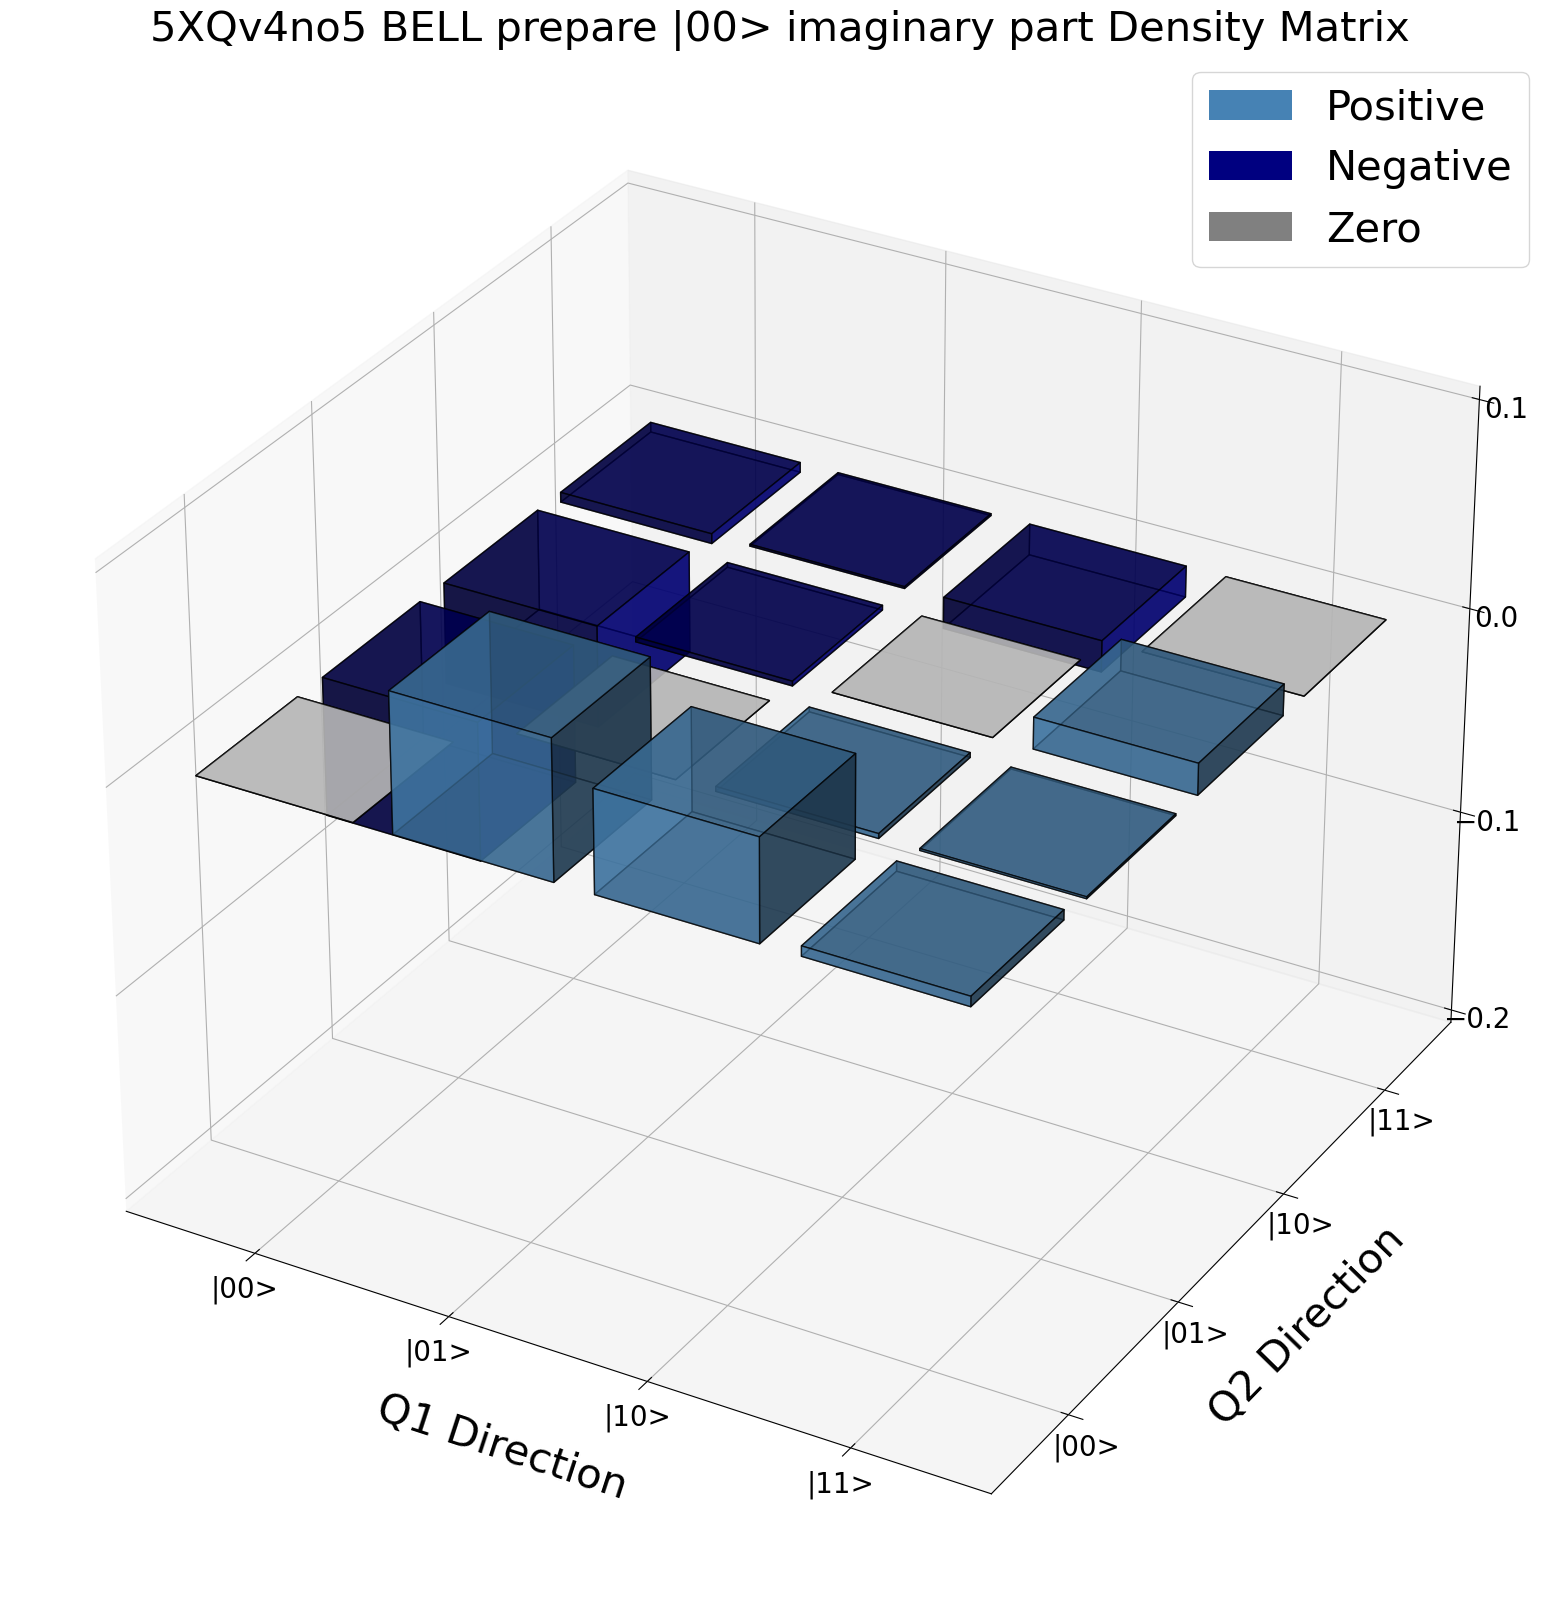

In [10]:
x_mtx = np.matrix([[0,1],[1,0]])
y_mtx = np.matrix([[0,-1j],[1j,0]])
z_mtx = np.matrix([[1,0],[0,-1]])
i_mtx = np.matrix([[1,0],[0,1]])
S_ii = sum(list(tomo_zz_GG.values()))

### |00> for try
S_xx = tomo_xx_GG['00']-tomo_xx_GG['01']-tomo_xx_GG['10']+tomo_xx_GG['11']
S_xy = tomo_xy_GG['00']-tomo_xy_GG['01']-tomo_xy_GG['10']+tomo_xy_GG['11']
S_xz = tomo_xz_GG['00']-tomo_xz_GG['01']-tomo_xz_GG['10']+tomo_xz_GG['11']
S_yx = tomo_yx_GG['00']-tomo_yx_GG['01']-tomo_yx_GG['10']+tomo_yx_GG['11']
S_yy = tomo_yy_GG['00']-tomo_yy_GG['01']-tomo_yy_GG['10']+tomo_yy_GG['11']
S_yz = tomo_yz_GG['00']-tomo_yz_GG['01']-tomo_yz_GG['10']+tomo_yz_GG['11']
S_zx = tomo_zx_GG['00']-tomo_zx_GG['01']-tomo_zx_GG['10']+tomo_zx_GG['11']
S_zy = tomo_zy_GG['00']-tomo_zy_GG['01']-tomo_zy_GG['10']+tomo_zy_GG['11']
S_zz = tomo_zz_GG['00']-tomo_zz_GG['01']-tomo_zz_GG['10']+tomo_zz_GG['11']
S_ix = tomo_xx_GG['00']-tomo_xx_GG['01']+tomo_xx_GG['10']-tomo_xx_GG['11']
S_iy = tomo_yy_GG['00']-tomo_yy_GG['01']+tomo_yy_GG['10']-tomo_yy_GG['11']
S_iz = tomo_zz_GG['00']-tomo_zz_GG['01']+tomo_zz_GG['10']-tomo_zz_GG['11']
S_xi = tomo_xx_GG['00']+tomo_xx_GG['01']-tomo_xx_GG['10']-tomo_xx_GG['11']
S_yi = tomo_yy_GG['00']+tomo_yy_GG['01']-tomo_yy_GG['10']-tomo_yy_GG['11']
S_zi = tomo_zz_GG['00']+tomo_zz_GG['01']-tomo_zz_GG['10']-tomo_zz_GG['11']

RHO_mtx_gg_row1 = S_ii*np.kron(i_mtx,i_mtx)+S_ix*np.kron(i_mtx,x_mtx)+S_iy*np.kron(i_mtx,y_mtx)+S_iz*np.kron(i_mtx,z_mtx)
RHO_mtx_gg_row2 = S_xi*np.kron(x_mtx,i_mtx)+S_xx*np.kron(x_mtx,x_mtx)+S_xy*np.kron(x_mtx,y_mtx)+S_xz*np.kron(x_mtx,z_mtx)
RHO_mtx_gg_row3 = S_yi*np.kron(y_mtx,i_mtx)+S_yx*np.kron(y_mtx,x_mtx)+S_yy*np.kron(y_mtx,y_mtx)+S_yz*np.kron(y_mtx,z_mtx)
RHO_mtx_gg_row4 = S_zi*np.kron(z_mtx,i_mtx)+S_zx*np.kron(z_mtx,x_mtx)+S_zy*np.kron(z_mtx,y_mtx)+S_zz*np.kron(z_mtx,z_mtx)

DM_rho_gg = (RHO_mtx_gg_row1 + RHO_mtx_gg_row2 + RHO_mtx_gg_row3 + RHO_mtx_gg_row4)/4
DM_gg_view = DM_rho_gg.view()
imDM_gg_view = DM_rho_gg.imag.view()
reDM_gg_view = DM_rho_gg.real.view()
print("Prepare |00> : ")
print("Whole Density matrix: ")
print(DM_gg_view)
print("\nDensity matrix real part: ")
print(reDM_gg_view)
print("\nDensity matrix imaginary part: ")
print(imDM_gg_view)
print("Trace Rho: ",np.trace(DM_rho_gg))
print("Trace Rho square: ",np.trace(np.square(DM_rho_gg)))
plot2QTOMO3DHist(DM_rho_gg.real,'5XQv4no5 BELL prepare |00> Real part ',False,version,"TOMO")
plot2QTOMO3DHist(DM_rho_gg.imag,'5XQv4no5 BELL prepare |00> imaginary part ',False,version,"TOMO")

Prepare |01> :
Whole Density matrix: 
[[ 0.2194 +0.j       0.08605-0.21935j  0.01355-0.00605j -0.0018 -0.01595j]
 [ 0.08605+0.21935j  0.6676 +0.j       0.0091 +0.01025j  0.04915-0.04435j]
 [ 0.01355+0.00605j  0.0091 -0.01025j  0.0265 +0.j       0.00615-0.02815j]
 [-0.0018 +0.01595j  0.04915+0.04435j  0.00615+0.02815j  0.0865 +0.j     ]]

Density matrix real part: 
[[ 0.2194   0.08605  0.01355 -0.0018 ]
 [ 0.08605  0.6676   0.0091   0.04915]
 [ 0.01355  0.0091   0.0265   0.00615]
 [-0.0018   0.04915  0.00615  0.0865 ]]

Density matrix imaginary part: 
[[ 0.      -0.21935 -0.00605 -0.01595]
 [ 0.21935  0.       0.01025 -0.04435]
 [ 0.00605 -0.01025  0.      -0.02815]
 [ 0.01595  0.04435  0.02815  0.     ]]
Trace Rho:  (1+0j)
Trace Rho square:  (0.50201062+0j)


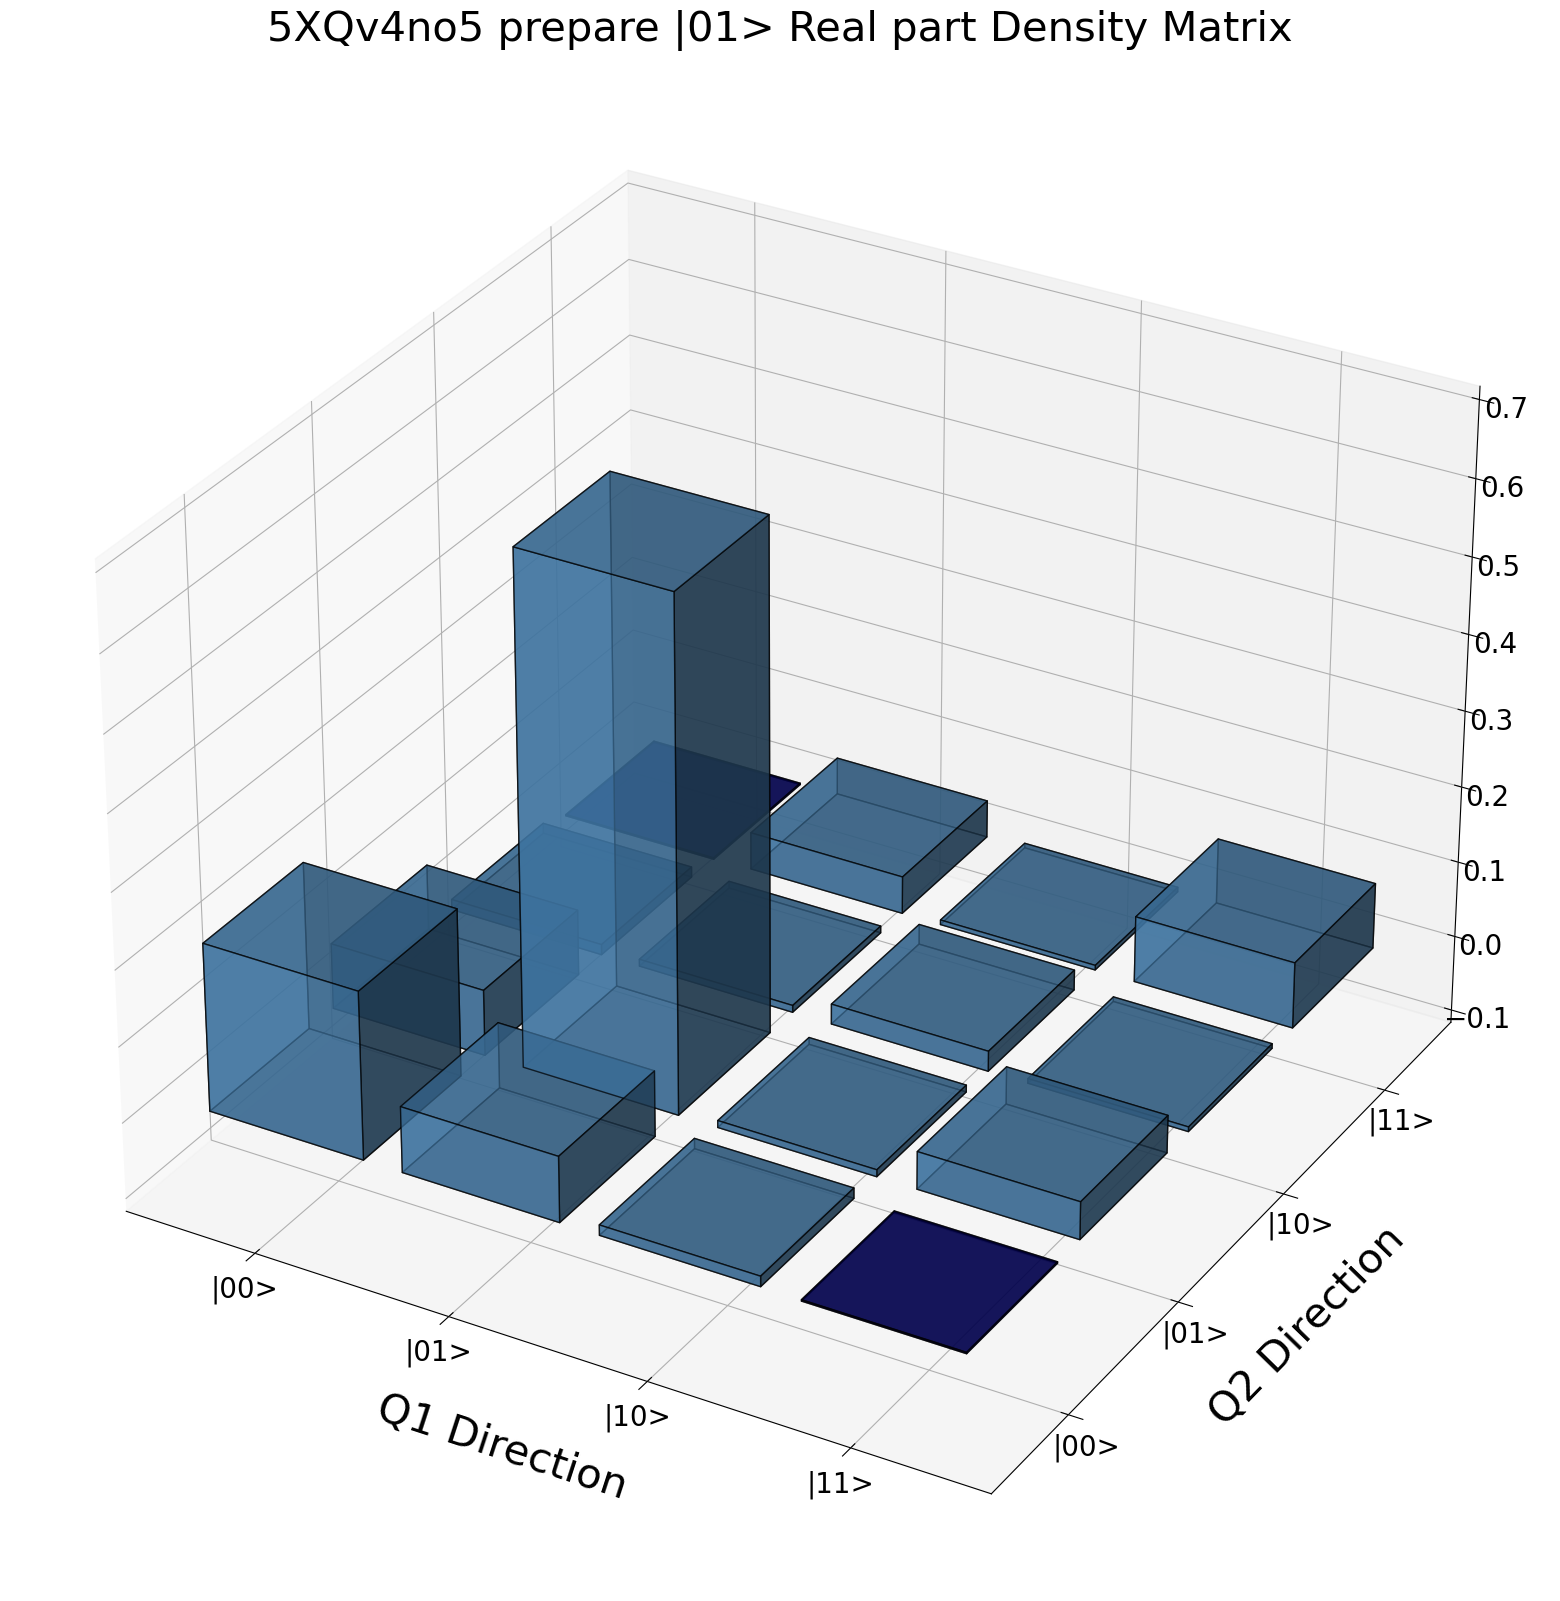

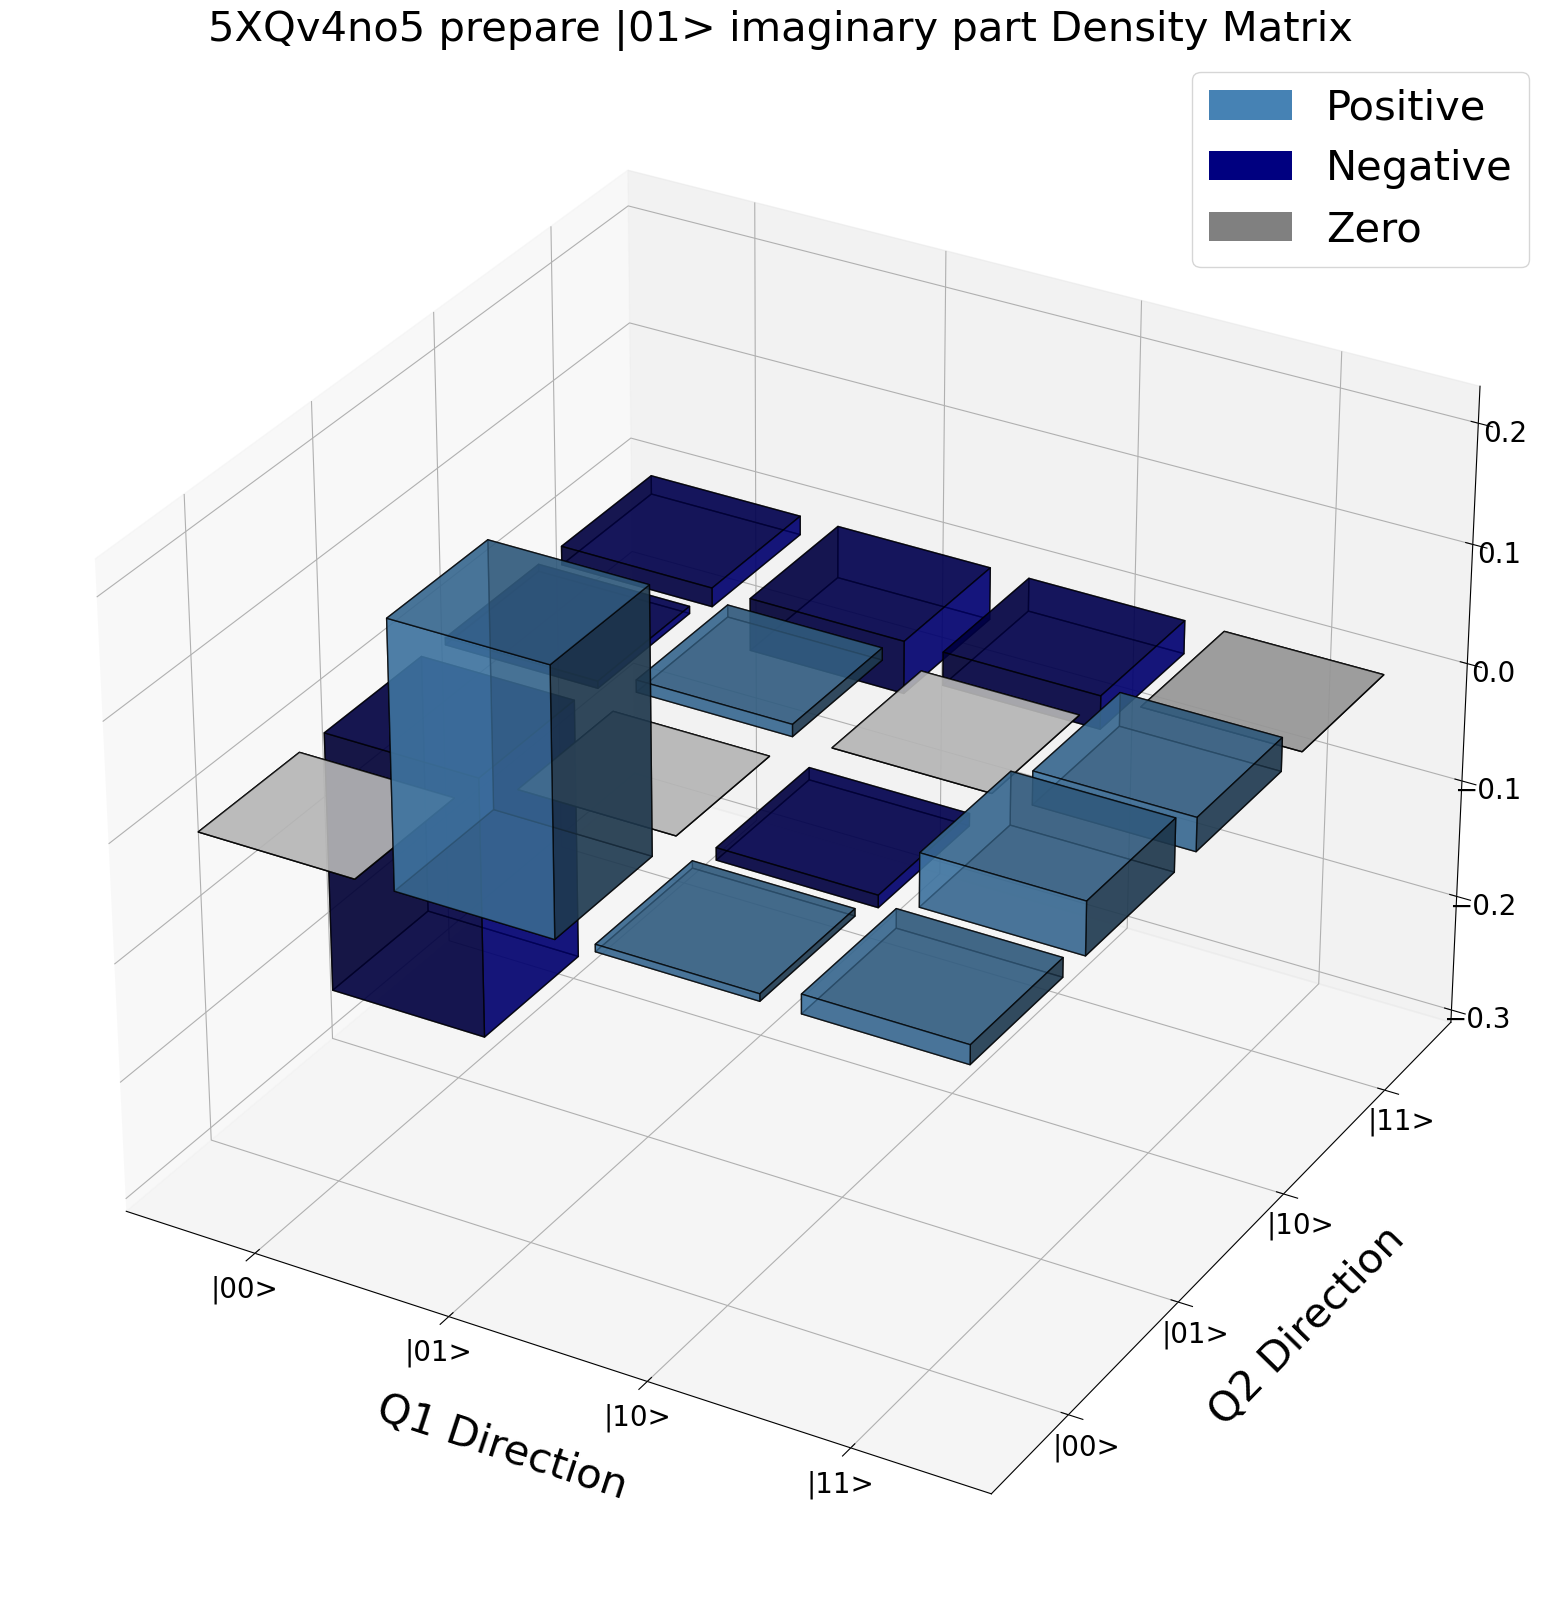

In [15]:
## |01>
S_xx = tomo_xx_GE['00']-tomo_xx_GE['01']-tomo_xx_GE['10']+tomo_xx_GE['11']
S_xy = tomo_xy_GE['00']-tomo_xy_GE['01']-tomo_xy_GE['10']+tomo_xy_GE['11']
S_xz = tomo_xz_GE['00']-tomo_xz_GE['01']-tomo_xz_GE['10']+tomo_xz_GE['11']
S_yx = tomo_yx_GE['00']-tomo_yx_GE['01']-tomo_yx_GE['10']+tomo_yx_GE['11']
S_yy = tomo_yy_GE['00']-tomo_yy_GE['01']-tomo_yy_GE['10']+tomo_yy_GE['11']
S_yz = tomo_yz_GE['00']-tomo_yz_GE['01']-tomo_yz_GE['10']+tomo_yz_GE['11']
S_zx = tomo_zx_GE['00']-tomo_zx_GE['01']-tomo_zx_GE['10']+tomo_zx_GE['11']
S_zy = tomo_zy_GE['00']-tomo_zy_GE['01']-tomo_zy_GE['10']+tomo_zy_GE['11']
S_zz = tomo_zz_GE['00']-tomo_zz_GE['01']-tomo_zz_GE['10']+tomo_zz_GE['11']
S_ix = tomo_xx_GE['00']-tomo_xx_GE['01']+tomo_xx_GE['10']-tomo_xx_GE['11']
S_iy = tomo_yy_GE['00']-tomo_yy_GE['01']+tomo_yy_GE['10']-tomo_yy_GE['11']
S_iz = tomo_zz_GE['00']-tomo_zz_GE['01']+tomo_zz_GE['10']-tomo_zz_GE['11']
S_xi = tomo_xx_GE['00']+tomo_xx_GE['01']-tomo_xx_GE['10']-tomo_xx_GE['11']
S_yi = tomo_yy_GE['00']+tomo_yy_GE['01']-tomo_yy_GE['10']-tomo_yy_GE['11']
S_zi = tomo_zz_GE['00']+tomo_zz_GE['01']-tomo_zz_GE['10']-tomo_zz_GE['11']

RHO_mtx_ge_row1 = S_ii*np.kron(i_mtx,i_mtx)+S_ix*np.kron(i_mtx,x_mtx)+S_iy*np.kron(i_mtx,y_mtx)+S_iz*np.kron(i_mtx,z_mtx)
RHO_mtx_ge_row2 = S_xi*np.kron(x_mtx,i_mtx)+S_xx*np.kron(x_mtx,x_mtx)+S_xy*np.kron(x_mtx,y_mtx)+S_xz*np.kron(x_mtx,z_mtx)
RHO_mtx_ge_row3 = S_yi*np.kron(y_mtx,i_mtx)+S_yx*np.kron(y_mtx,x_mtx)+S_yy*np.kron(y_mtx,y_mtx)+S_yz*np.kron(y_mtx,z_mtx)
RHO_mtx_ge_row4 = S_zi*np.kron(z_mtx,i_mtx)+S_zx*np.kron(z_mtx,x_mtx)+S_zy*np.kron(z_mtx,y_mtx)+S_zz*np.kron(z_mtx,z_mtx)

DM_rho_ge = (RHO_mtx_ge_row1 + RHO_mtx_ge_row2 + RHO_mtx_ge_row3 + RHO_mtx_ge_row4)/4
DM_ge_view = DM_rho_ge.view()
imDM_ge_view = DM_rho_ge.imag.view()
reDM_ge_view = DM_rho_ge.real.view()
print("Prepare |01> :")
print("Whole Density matrix: ")
print(DM_ge_view)
print("\nDensity matrix real part: ")
print(reDM_ge_view)
print("\nDensity matrix imaginary part: ")
print(imDM_ge_view)
print("Trace Rho: ",np.trace(DM_rho_ge))
print("Trace Rho square: ",np.trace(np.square(DM_rho_ge)))
plot2QTOMO3DHist(DM_rho_ge.real,'5XQv4no5 prepare |01> Real part ',False,version,"TOMO")
plot2QTOMO3DHist(DM_rho_ge.imag,'5XQv4no5 prepare |01> imaginary part ',False,version,"TOMO")


Prepare |10> :
Whole Density matrix: 
[[ 0.173  +0.j       0.01085-0.00665j  0.00525-0.11985j -0.0108 -0.0109j ]
 [ 0.01085+0.00665j  0.0052 +0.j       0.0096 -0.0107j  -0.00285+0.00975j]
 [ 0.00525+0.11985j  0.0096 +0.0107j   0.7996 +0.j       0.06995-0.07065j]
 [-0.0108 +0.0109j  -0.00285-0.00975j  0.06995+0.07065j  0.0222 +0.j     ]]

Density matrix real part: 
[[ 0.173    0.01085  0.00525 -0.0108 ]
 [ 0.01085  0.0052   0.0096  -0.00285]
 [ 0.00525  0.0096   0.7996   0.06995]
 [-0.0108  -0.00285  0.06995  0.0222 ]]

Density matrix imaginary part: 
[[ 0.      -0.00665 -0.11985 -0.0109 ]
 [ 0.00665  0.      -0.0107   0.00975]
 [ 0.11985  0.0107   0.      -0.07065]
 [ 0.0109  -0.00975  0.07065  0.     ]]
Trace Rho:  (0.9999999999999999+0j)
Trace Rho square:  (0.66980904+0j)


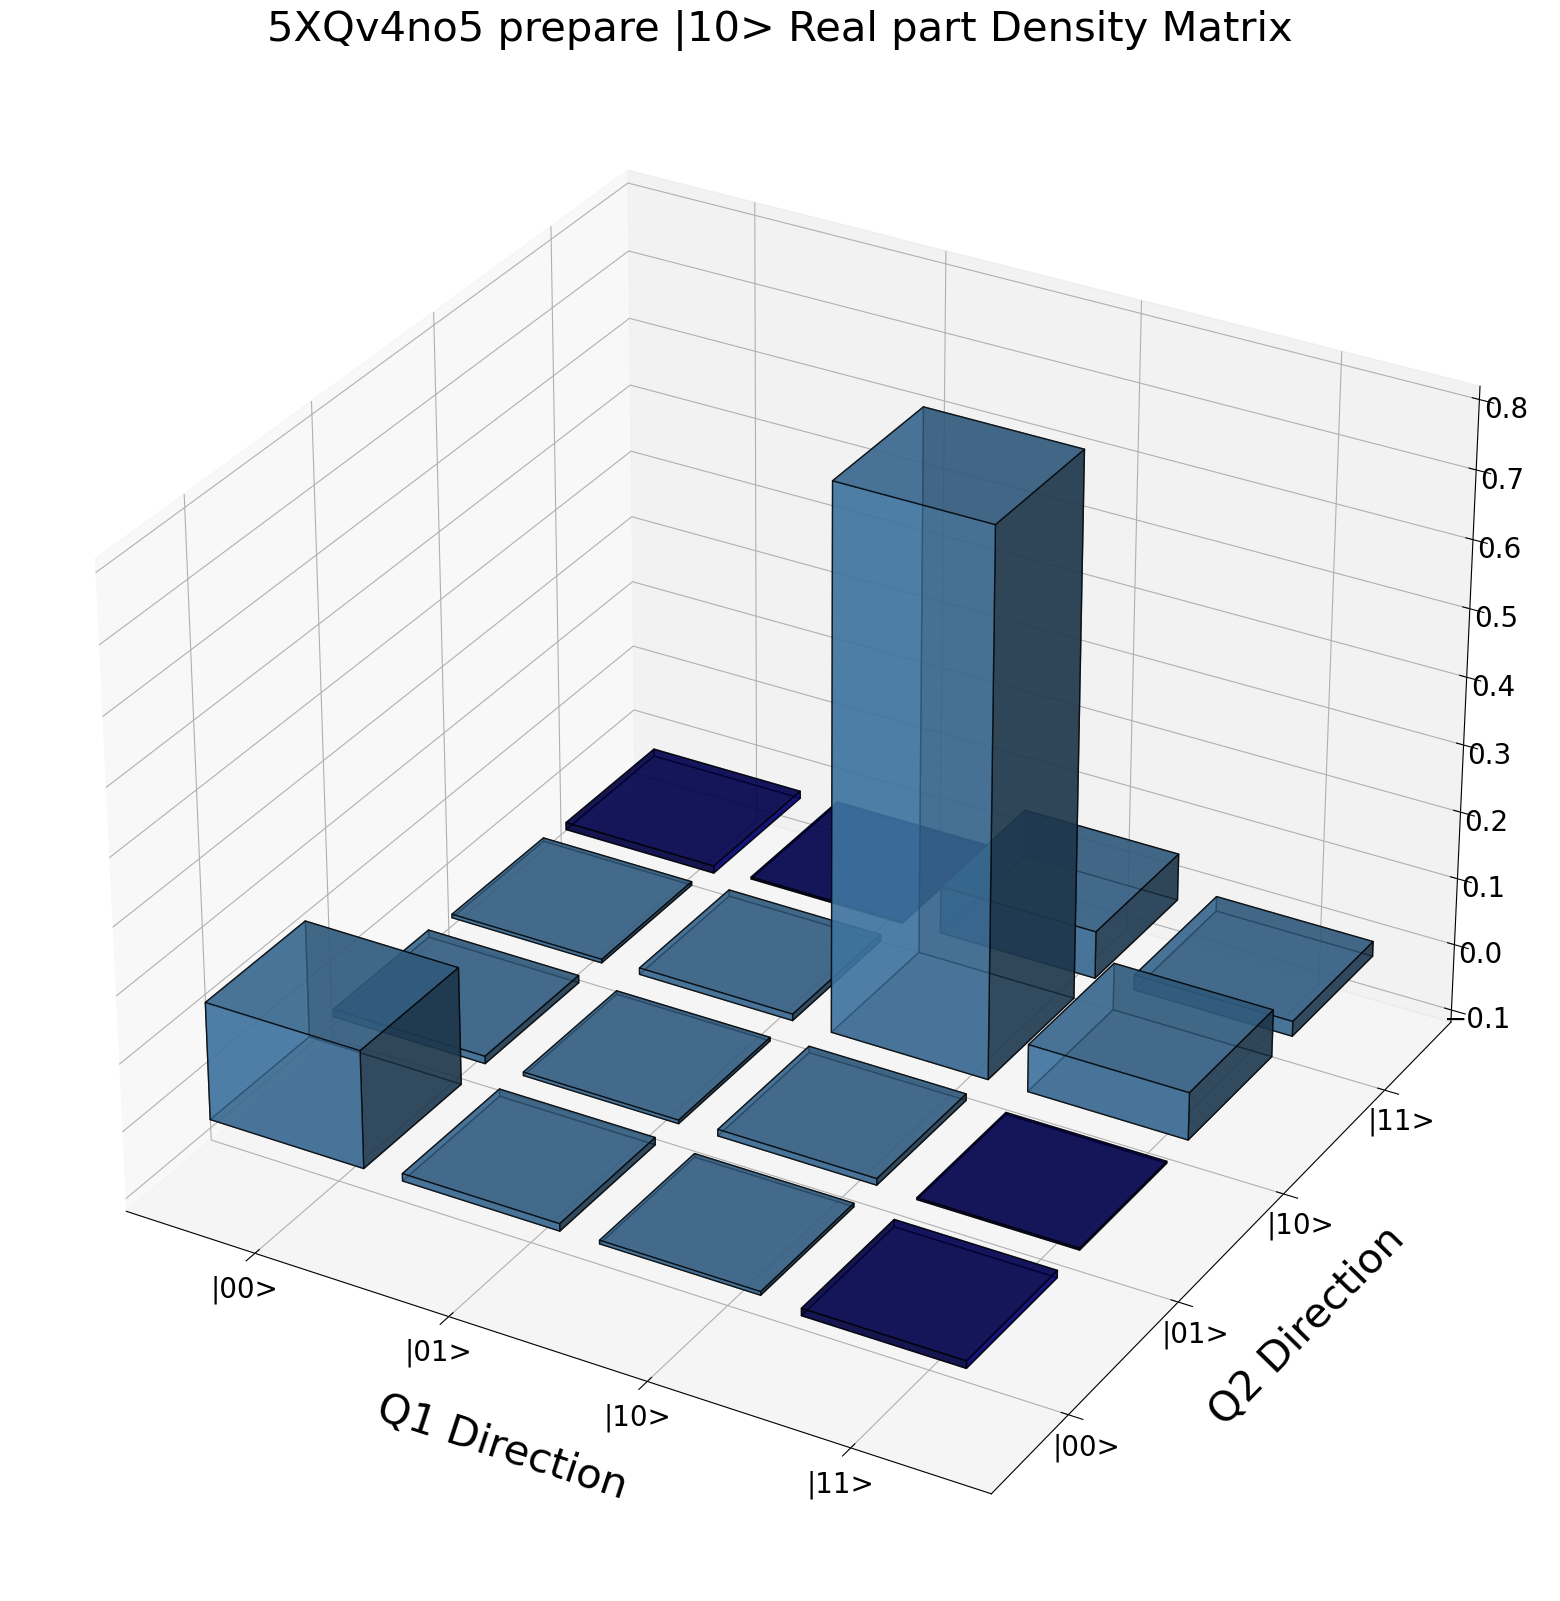

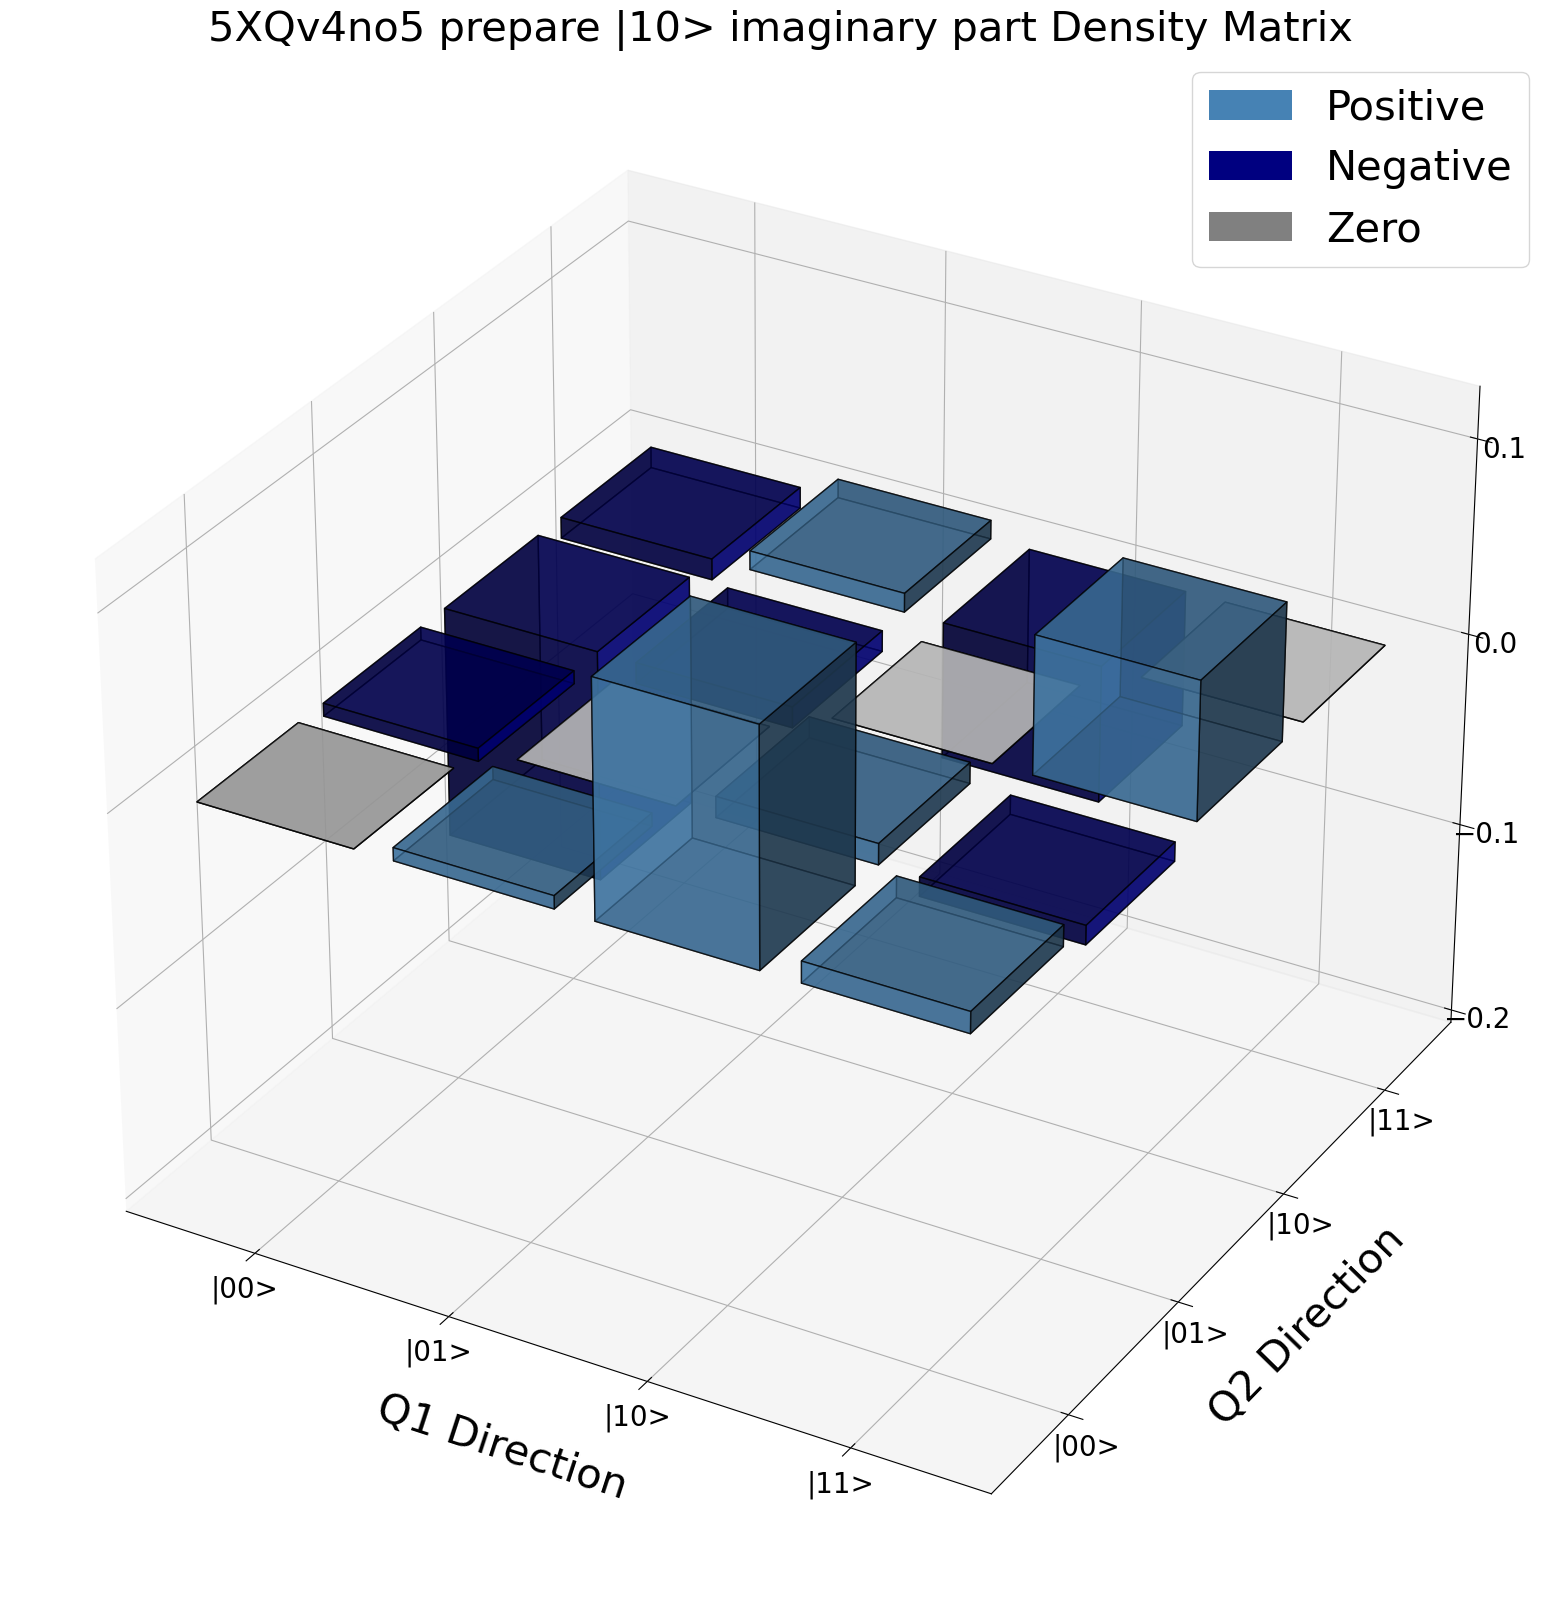

In [16]:
## |10>
S_xx = tomo_xx_EG['00']-tomo_xx_EG['01']-tomo_xx_EG['10']+tomo_xx_EG['11']
S_xy = tomo_xy_EG['00']-tomo_xy_EG['01']-tomo_xy_EG['10']+tomo_xy_EG['11']
S_xz = tomo_xz_EG['00']-tomo_xz_EG['01']-tomo_xz_EG['10']+tomo_xz_EG['11']
S_yx = tomo_yx_EG['00']-tomo_yx_EG['01']-tomo_yx_EG['10']+tomo_yx_EG['11']
S_yy = tomo_yy_EG['00']-tomo_yy_EG['01']-tomo_yy_EG['10']+tomo_yy_EG['11']
S_yz = tomo_yz_EG['00']-tomo_yz_EG['01']-tomo_yz_EG['10']+tomo_yz_EG['11']
S_zx = tomo_zx_EG['00']-tomo_zx_EG['01']-tomo_zx_EG['10']+tomo_zx_EG['11']
S_zy = tomo_zy_EG['00']-tomo_zy_EG['01']-tomo_zy_EG['10']+tomo_zy_EG['11']
S_zz = tomo_zz_EG['00']-tomo_zz_EG['01']-tomo_zz_EG['10']+tomo_zz_EG['11']
S_ix = tomo_xx_EG['00']-tomo_xx_EG['01']+tomo_xx_EG['10']-tomo_xx_EG['11']
S_iy = tomo_yy_EG['00']-tomo_yy_EG['01']+tomo_yy_EG['10']-tomo_yy_EG['11']
S_iz = tomo_zz_EG['00']-tomo_zz_EG['01']+tomo_zz_EG['10']-tomo_zz_EG['11']
S_xi = tomo_xx_EG['00']+tomo_xx_EG['01']-tomo_xx_EG['10']-tomo_xx_EG['11']
S_yi = tomo_yy_EG['00']+tomo_yy_EG['01']-tomo_yy_EG['10']-tomo_yy_EG['11']
S_zi = tomo_zz_EG['00']+tomo_zz_EG['01']-tomo_zz_EG['10']-tomo_zz_EG['11']

RHO_mtx_eg_row1 = S_ii*np.kron(i_mtx,i_mtx)+S_ix*np.kron(i_mtx,x_mtx)+S_iy*np.kron(i_mtx,y_mtx)+S_iz*np.kron(i_mtx,z_mtx)
RHO_mtx_eg_row2 = S_xi*np.kron(x_mtx,i_mtx)+S_xx*np.kron(x_mtx,x_mtx)+S_xy*np.kron(x_mtx,y_mtx)+S_xz*np.kron(x_mtx,z_mtx)
RHO_mtx_eg_row3 = S_yi*np.kron(y_mtx,i_mtx)+S_yx*np.kron(y_mtx,x_mtx)+S_yy*np.kron(y_mtx,y_mtx)+S_yz*np.kron(y_mtx,z_mtx)
RHO_mtx_eg_row4 = S_zi*np.kron(z_mtx,i_mtx)+S_zx*np.kron(z_mtx,x_mtx)+S_zy*np.kron(z_mtx,y_mtx)+S_zz*np.kron(z_mtx,z_mtx)

DM_rho_eg = (RHO_mtx_eg_row1 + RHO_mtx_eg_row2 + RHO_mtx_eg_row3 + RHO_mtx_eg_row4)/4
DM_eg_view = DM_rho_eg.view()
imDM_eg_view = DM_rho_eg.imag.view()
reDM_eg_view = DM_rho_eg.real.view()
print("Prepare |10> :")
print("Whole Density matrix: ")
print(DM_eg_view)
print("\nDensity matrix real part: ")
print(reDM_eg_view)
print("\nDensity matrix imaginary part: ")
print(imDM_eg_view)
print("Trace Rho: ",np.trace(DM_rho_eg))
print("Trace Rho square: ",np.trace(np.square(DM_rho_eg)))
plot2QTOMO3DHist(DM_rho_eg.real,'5XQv4no5 prepare |10> Real part ',False,version,"TOMO")
plot2QTOMO3DHist(DM_rho_eg.imag,'5XQv4no5 prepare |10> imaginary part ',False,version,"TOMO")


Prepare |11> :
Whole Density matrix: 
[[ 0.0473 +0.j       0.0022 -0.04405j -0.00435-0.03025j -0.03015-0.0122j ]
 [ 0.0022 +0.04405j  0.1358 +0.j       0.03375-0.0119j  -0.00755-0.08705j]
 [-0.00435+0.03025j  0.03375+0.0119j   0.2427 +0.j       0.0723 -0.19015j]
 [-0.03015+0.0122j  -0.00755+0.08705j  0.0723 +0.19015j  0.5742 +0.j     ]]

Density matrix real part: 
[[ 0.0473   0.0022  -0.00435 -0.03015]
 [ 0.0022   0.1358   0.03375 -0.00755]
 [-0.00435  0.03375  0.2427   0.0723 ]
 [-0.03015 -0.00755  0.0723   0.5742 ]]

Density matrix imaginary part: 
[[ 0.      -0.04405 -0.03025 -0.0122 ]
 [ 0.04405  0.      -0.0119  -0.08705]
 [ 0.03025  0.0119   0.      -0.19015]
 [ 0.0122   0.08705  0.19015  0.     ]]
Trace Rho:  (0.9999999999999999+0j)
Trace Rho square:  (0.40928786000000006+0j)


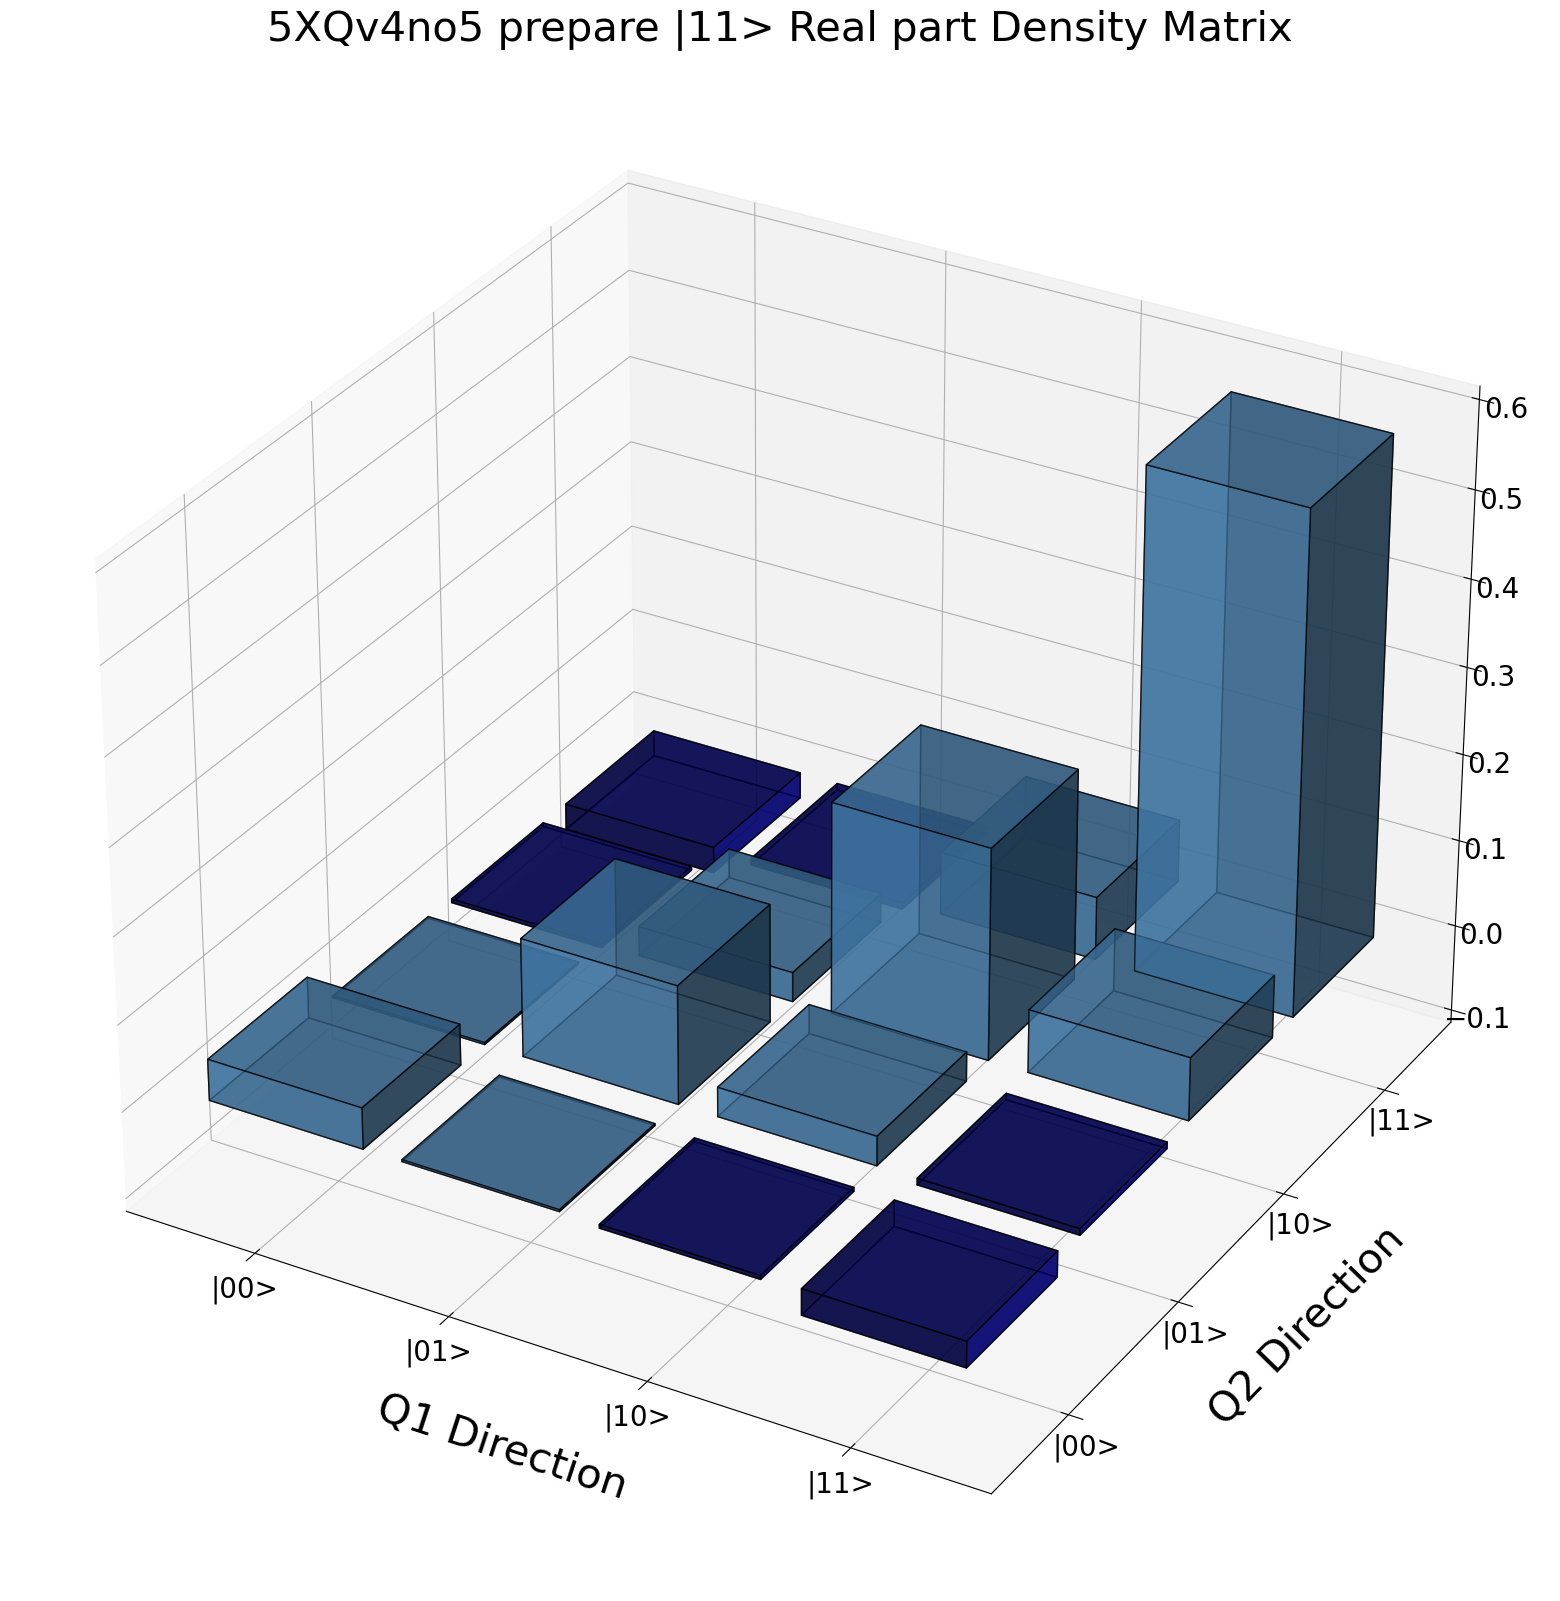

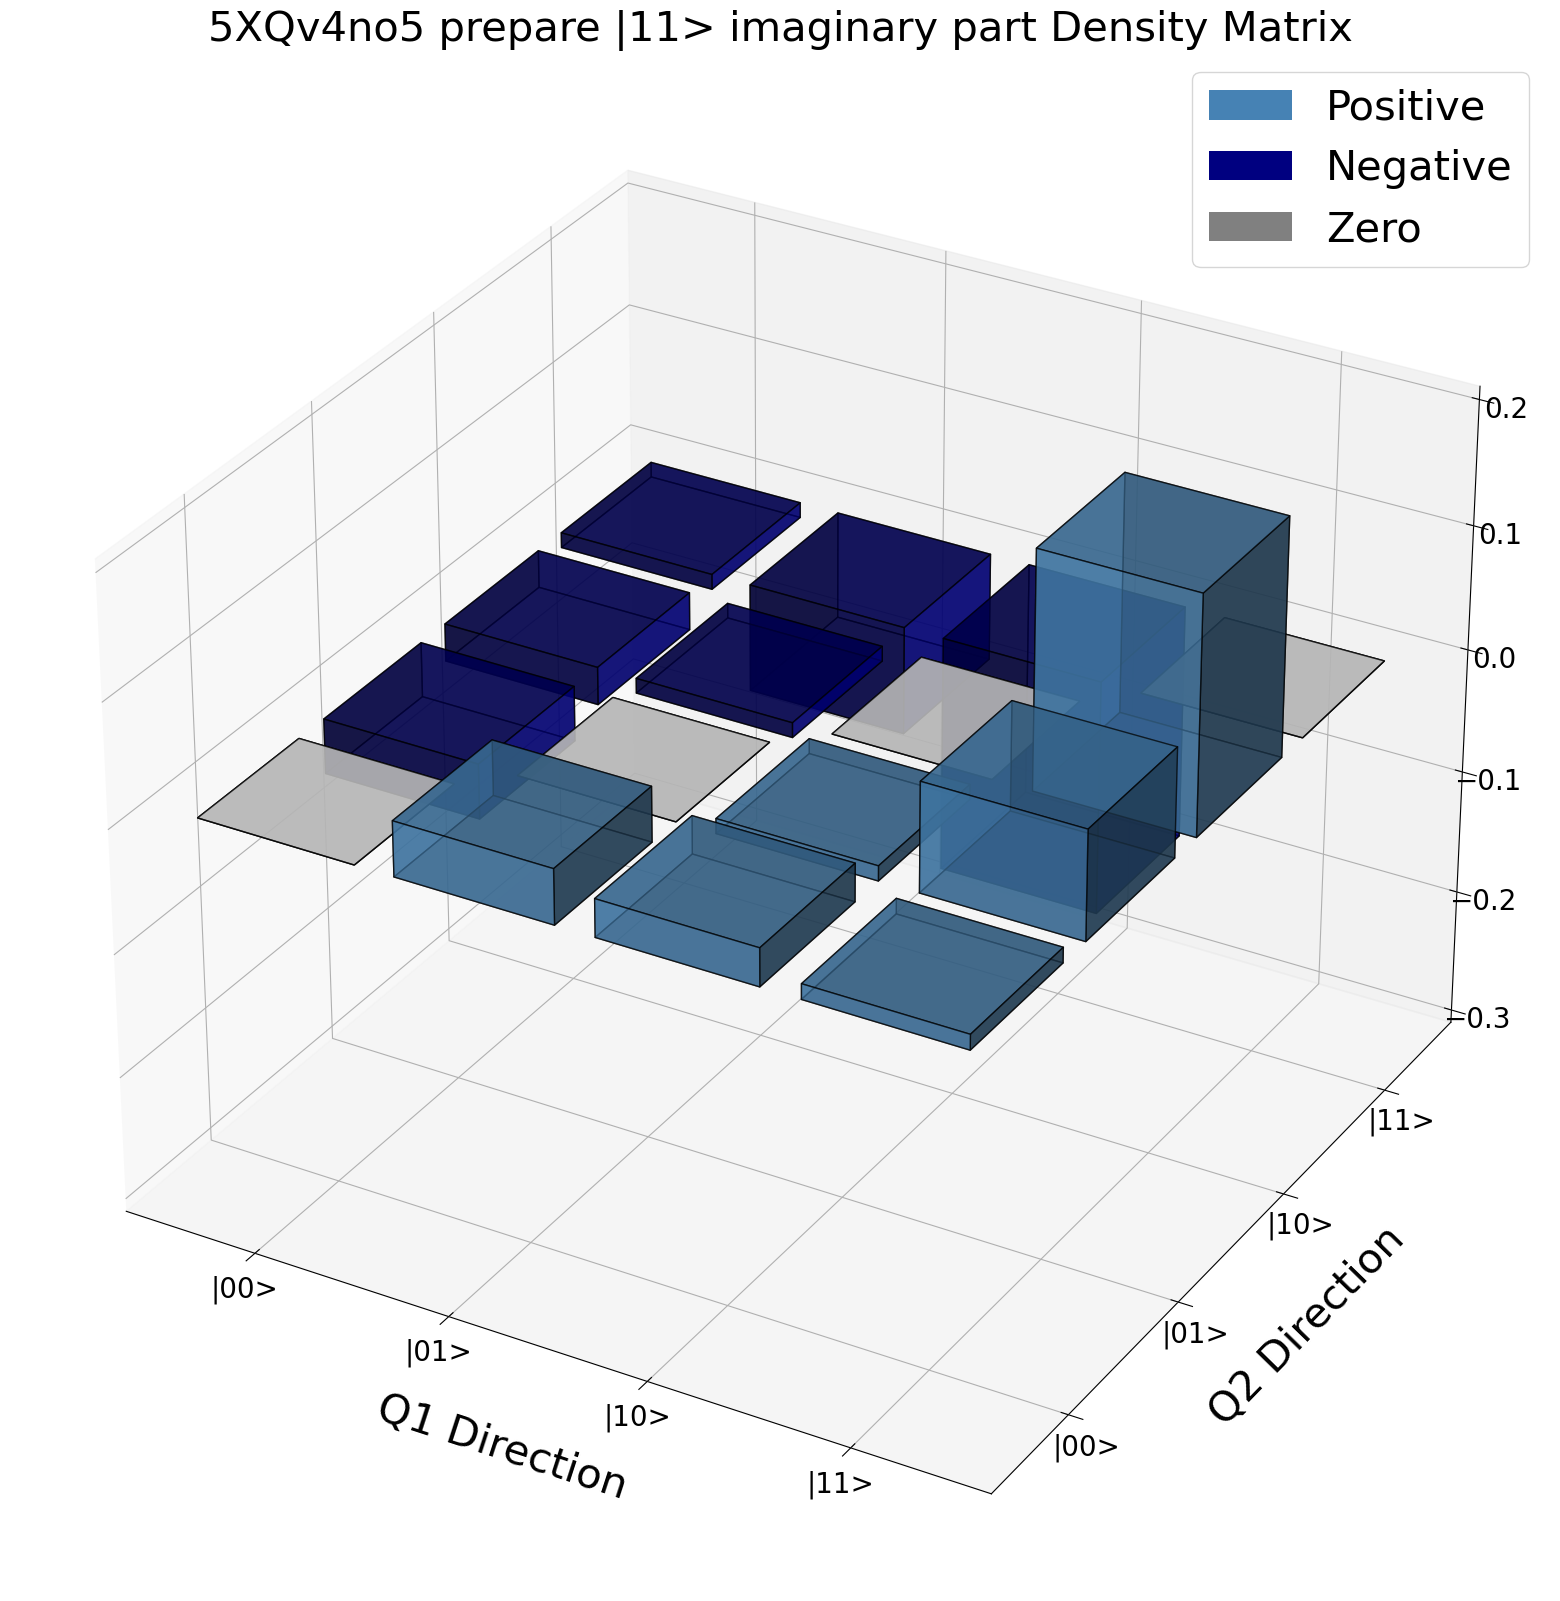

In [17]:
## |11>
S_xx = tomo_xx_EE['00']-tomo_xx_EE['01']-tomo_xx_EE['10']+tomo_xx_EE['11']
S_xy = tomo_xy_EE['00']-tomo_xy_EE['01']-tomo_xy_EE['10']+tomo_xy_EE['11']
S_xz = tomo_xz_EE['00']-tomo_xz_EE['01']-tomo_xz_EE['10']+tomo_xz_EE['11']
S_yx = tomo_yx_EE['00']-tomo_yx_EE['01']-tomo_yx_EE['10']+tomo_yx_EE['11']
S_yy = tomo_yy_EE['00']-tomo_yy_EE['01']-tomo_yy_EE['10']+tomo_yy_EE['11']
S_yz = tomo_yz_EE['00']-tomo_yz_EE['01']-tomo_yz_EE['10']+tomo_yz_EE['11']
S_zx = tomo_zx_EE['00']-tomo_zx_EE['01']-tomo_zx_EE['10']+tomo_zx_EE['11']
S_zy = tomo_zy_EE['00']-tomo_zy_EE['01']-tomo_zy_EE['10']+tomo_zy_EE['11']
S_zz = tomo_zz_EE['00']-tomo_zz_EE['01']-tomo_zz_EE['10']+tomo_zz_EE['11']
S_ix = tomo_xx_EE['00']-tomo_xx_EE['01']+tomo_xx_EE['10']-tomo_xx_EE['11']
S_iy = tomo_yy_EE['00']-tomo_yy_EE['01']+tomo_yy_EE['10']-tomo_yy_EE['11']
S_iz = tomo_zz_EE['00']-tomo_zz_EE['01']+tomo_zz_EE['10']-tomo_zz_EE['11']
S_xi = tomo_xx_EE['00']+tomo_xx_EE['01']-tomo_xx_EE['10']-tomo_xx_EE['11']
S_yi = tomo_yy_EE['00']+tomo_yy_EE['01']-tomo_yy_EE['10']-tomo_yy_EE['11']
S_zi = tomo_zz_EE['00']+tomo_zz_EE['01']-tomo_zz_EE['10']-tomo_zz_EE['11']

RHO_mtx_ee_row1 = S_ii*np.kron(i_mtx,i_mtx)+S_ix*np.kron(i_mtx,x_mtx)+S_iy*np.kron(i_mtx,y_mtx)+S_iz*np.kron(i_mtx,z_mtx)
RHO_mtx_ee_row2 = S_xi*np.kron(x_mtx,i_mtx)+S_xx*np.kron(x_mtx,x_mtx)+S_xy*np.kron(x_mtx,y_mtx)+S_xz*np.kron(x_mtx,z_mtx)
RHO_mtx_ee_row3 = S_yi*np.kron(y_mtx,i_mtx)+S_yx*np.kron(y_mtx,x_mtx)+S_yy*np.kron(y_mtx,y_mtx)+S_yz*np.kron(y_mtx,z_mtx)
RHO_mtx_ee_row4 = S_zi*np.kron(z_mtx,i_mtx)+S_zx*np.kron(z_mtx,x_mtx)+S_zy*np.kron(z_mtx,y_mtx)+S_zz*np.kron(z_mtx,z_mtx)

DM_rho_ee = (RHO_mtx_ee_row1 + RHO_mtx_ee_row2 + RHO_mtx_ee_row3 + RHO_mtx_ee_row4)/4
DM_ee_view = DM_rho_ee.view()
imDM_ee_view = DM_rho_ee.imag.view()
reDM_ee_view = DM_rho_ee.real.view()
print("Prepare |11> :")
print("Whole Density matrix: ")
print(DM_ee_view)
print("\nDensity matrix real part: ")
print(reDM_ee_view)
print("\nDensity matrix imaginary part: ")
print(imDM_ee_view)
print("Trace Rho: ",np.trace(DM_rho_ee))
print("Trace Rho square: ",np.trace(np.square(DM_rho_ee)))
plot2QTOMO3DHist(DM_rho_ee.real,'5XQv4no5 prepare |11> Real part ',False,version,"TOMO")
plot2QTOMO3DHist(DM_rho_ee.imag,'5XQv4no5 prepare |11> imaginary part ',False,version,"TOMO")